In [1]:
# Standard library imports
import os

# Scientific computing libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Time series analysis libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse

# Deep learning libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models

# Utility libraries
import optuna # Hyperparameter optimization
from optuna.visualization import plot_parallel_coordinate, plot_slice, plot_param_importances
from tqdm import tqdm  # Progress bar visualization

# Custom libraries
from effKAN import KAN

In [2]:
#read car data
data = pd.read_csv('./data/car_data.csv')

In [3]:
data.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
#check for missing values
data.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [6]:
data = data.fillna('0')

# Graph

## Univariable Analysis

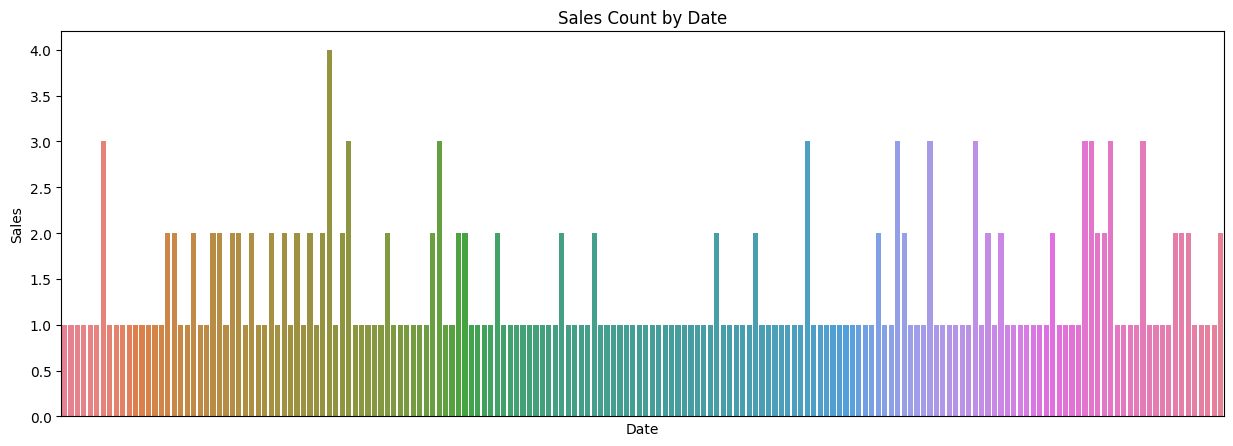

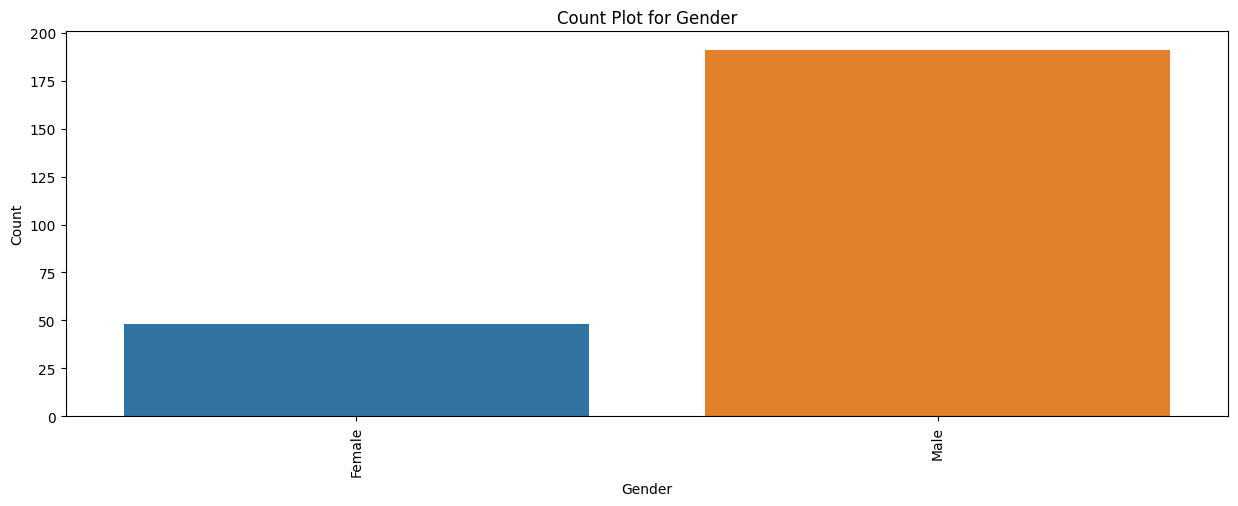

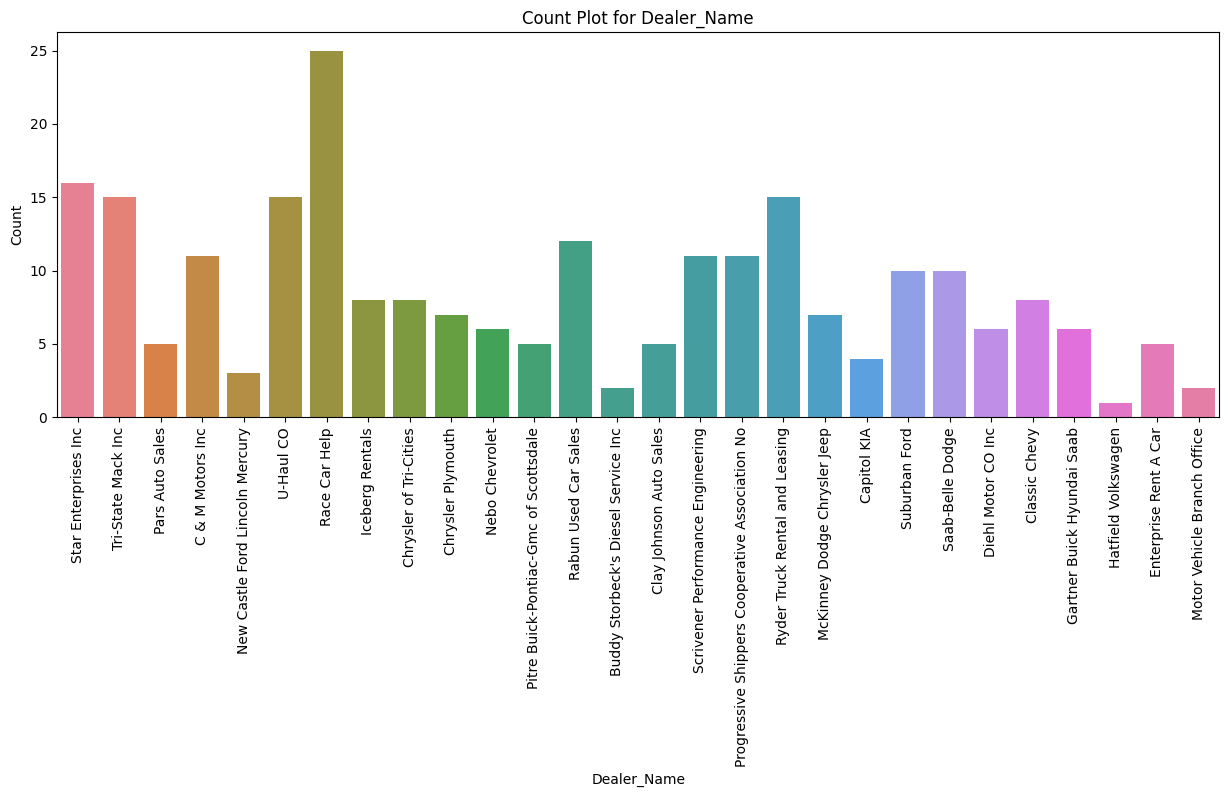

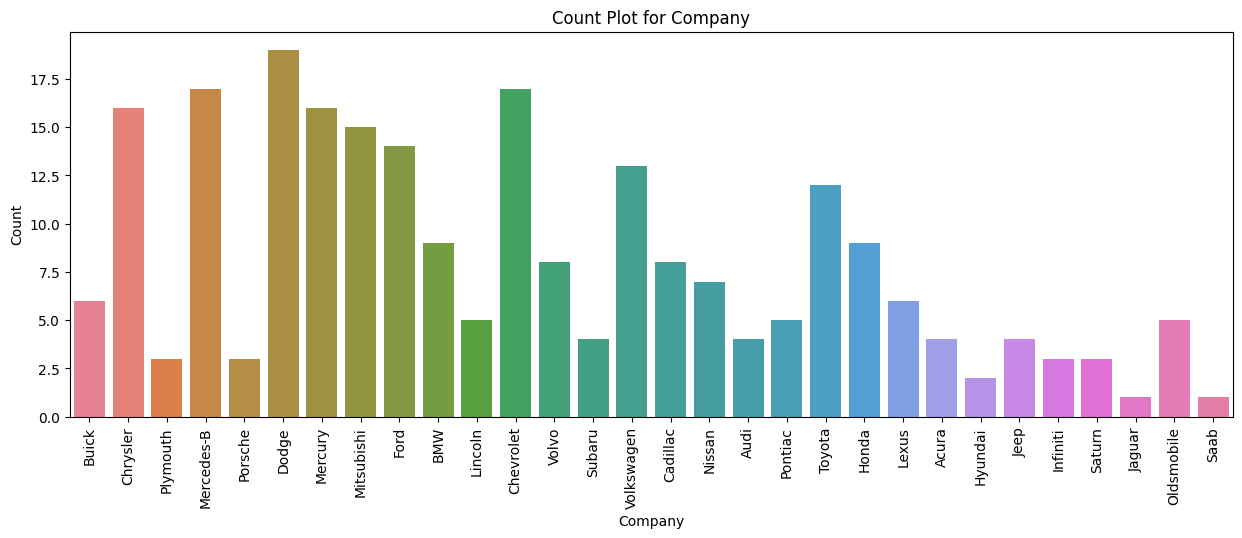

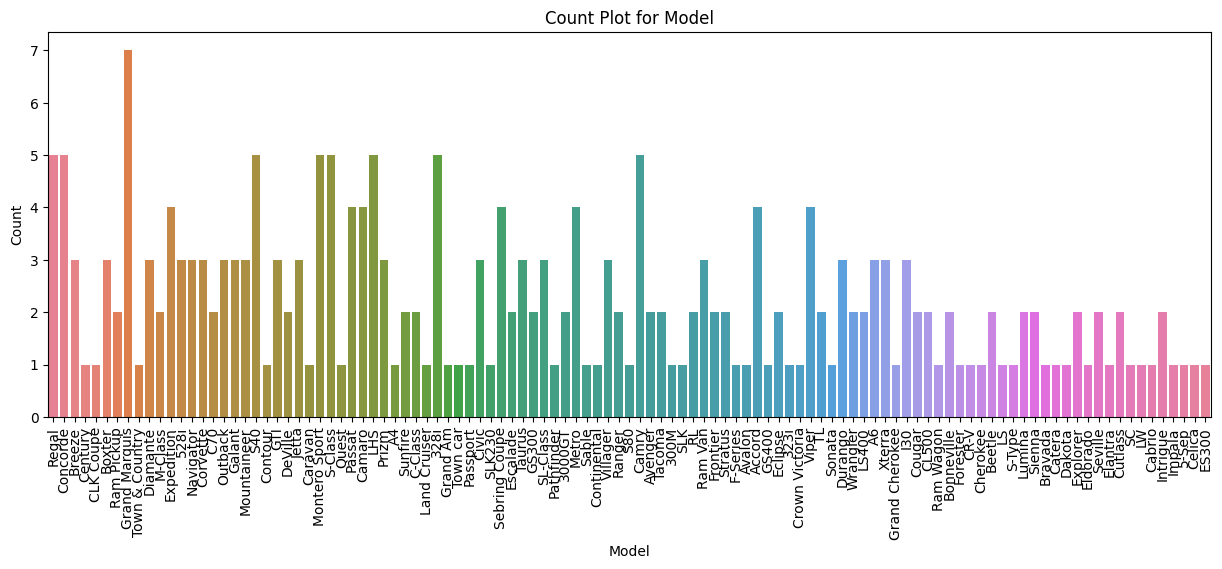

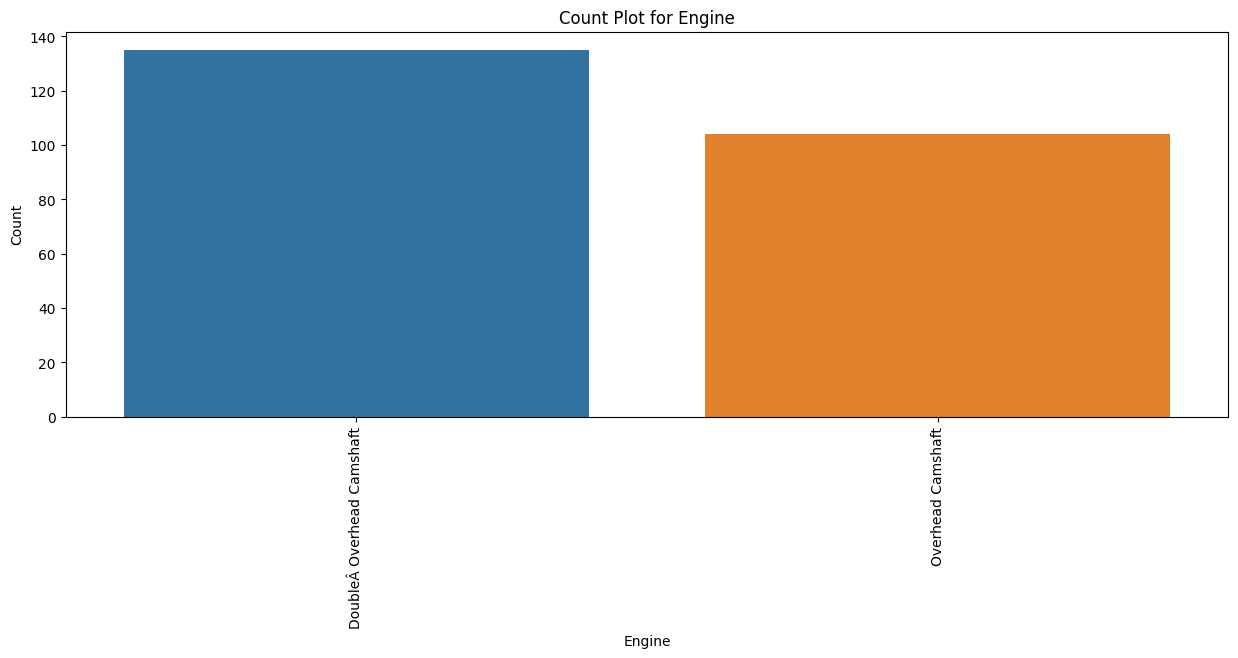

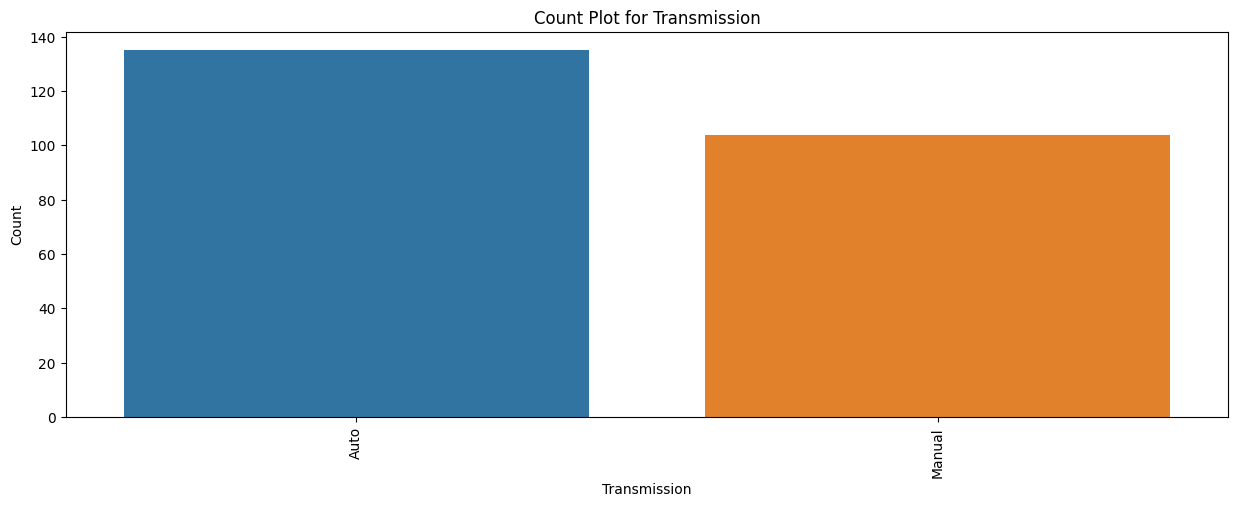

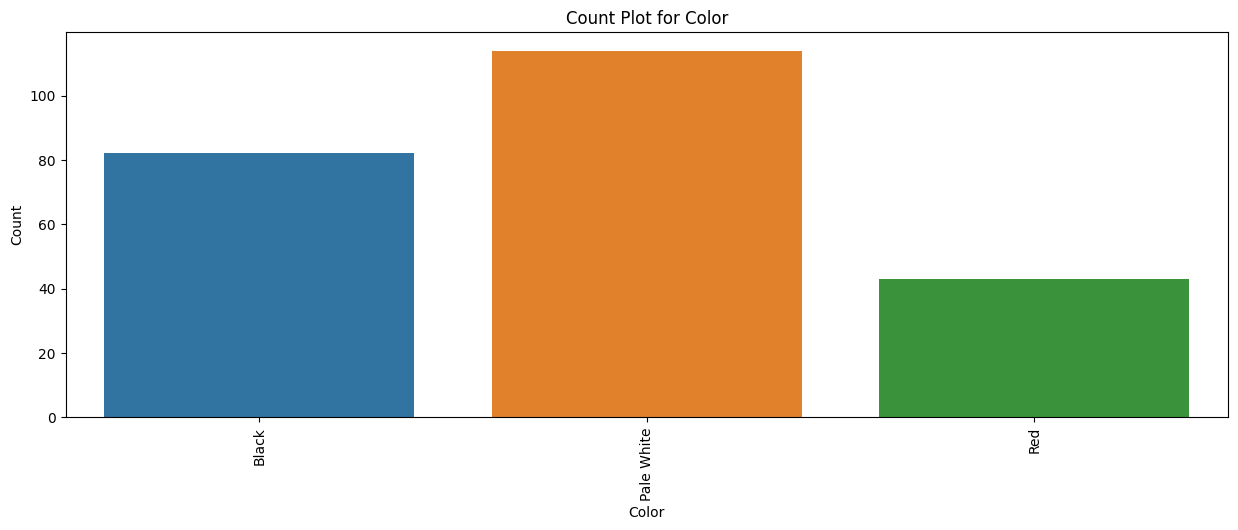

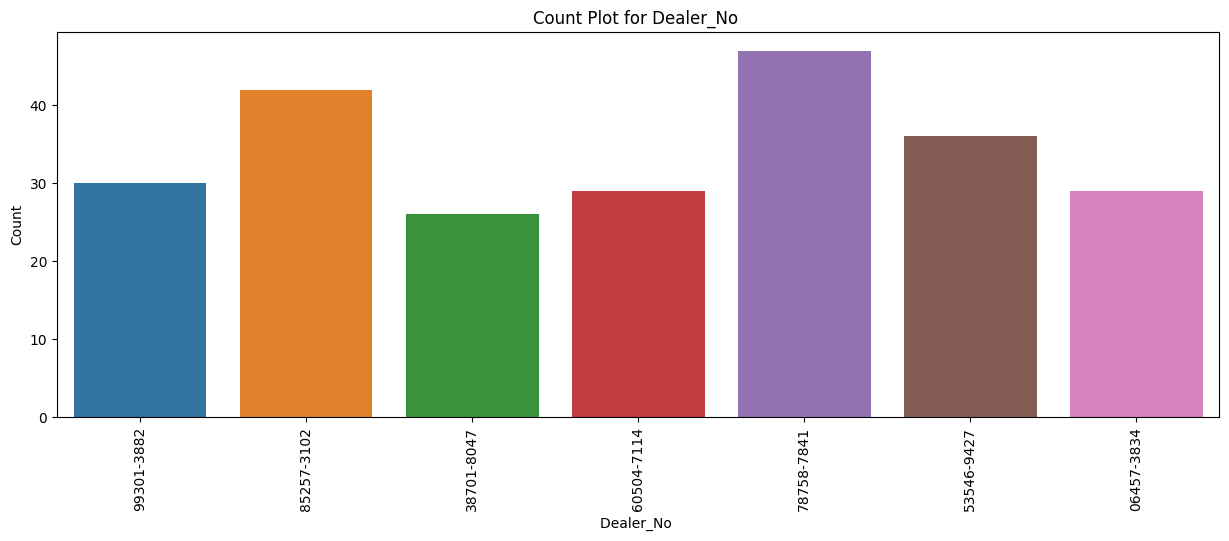

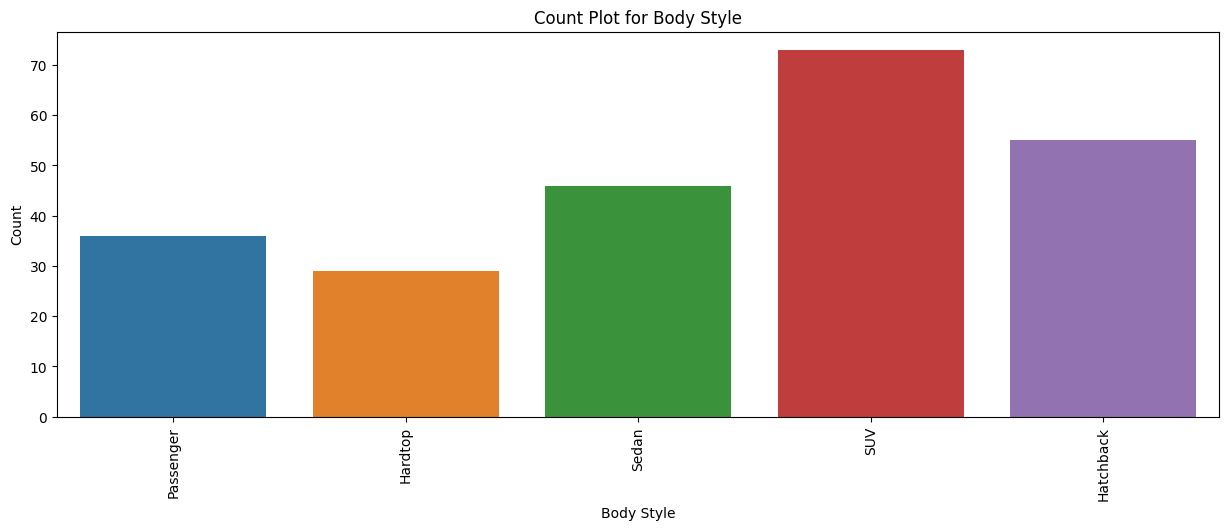

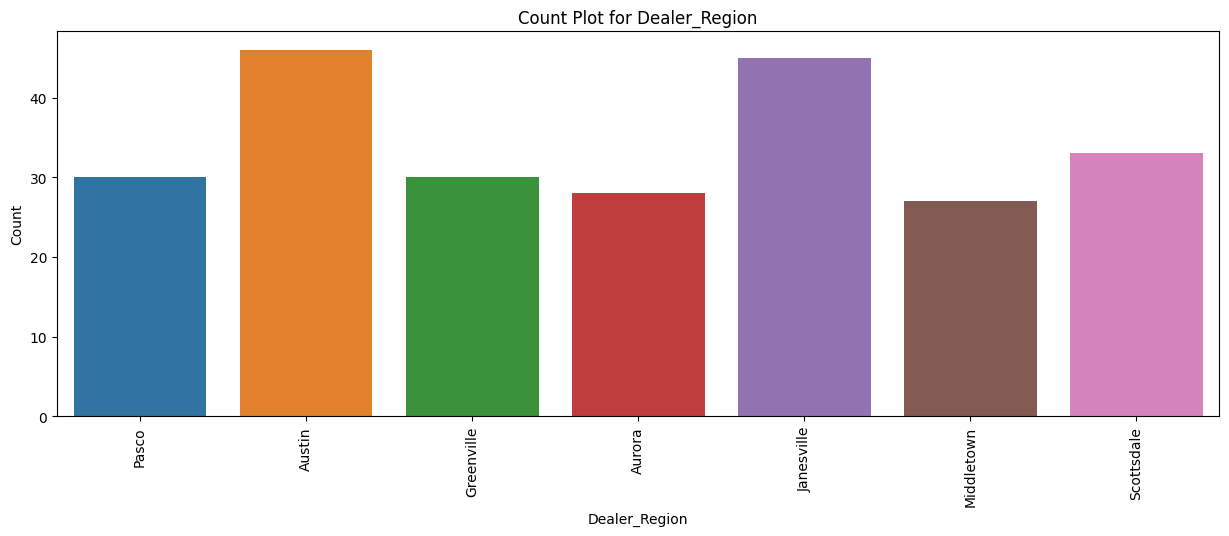

In [7]:
sampled_data = data.sample(frac=0.01, random_state=42)

object_columns = sampled_data.select_dtypes(include=['object']).columns
object_columns = object_columns.drop(['Car_id','Customer Name','Date'])

if not os.path.exists('./graph/univariate'):
    os.makedirs('./graph/univariate')

# For Date Count
sales_counts = sampled_data['Date'].value_counts().sort_index().reset_index()
sales_counts.columns = ['Date', 'Sales']
plt.figure(figsize=(15, 5))
sns.barplot(x='Date', y='Sales', data=sales_counts, hue='Date')
plt.title('Sales Count by Date')
plt.xticks([])
plt.savefig('./graph/univariate/sales_count_by_date.png')
plt.show()

for i in range(len(object_columns)):
    plt.figure(figsize=(15, 5))
    sns.countplot(x=object_columns[i], data=sampled_data, hue=object_columns[i])
    plt.title(f'Count Plot for {object_columns[i]}')
    plt.xlabel(object_columns[i])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.savefig(f'./graph/univariate/{object_columns[i]}_countplot.png')

plt.show()

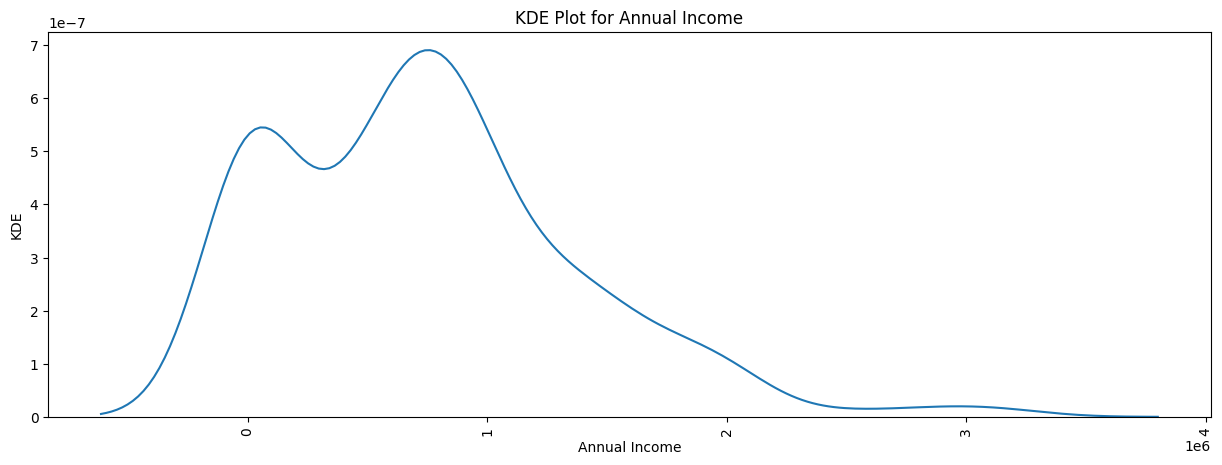

In [8]:
plt.figure(figsize=(15, 5))
sns.kdeplot(x=sampled_data['Annual Income'], data=sampled_data)
plt.title(f'KDE Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('KDE')
plt.xticks(rotation=90)
plt.savefig(f'./graph/univariate/Annual_Income_KDEplot.png')
plt.show()

## Bivariable Analysis

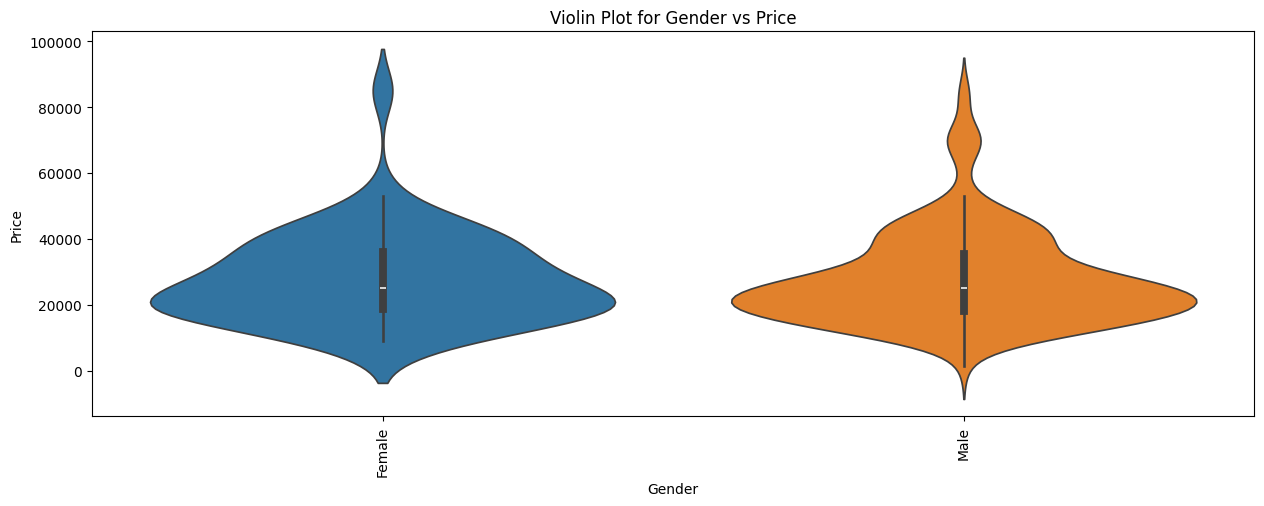

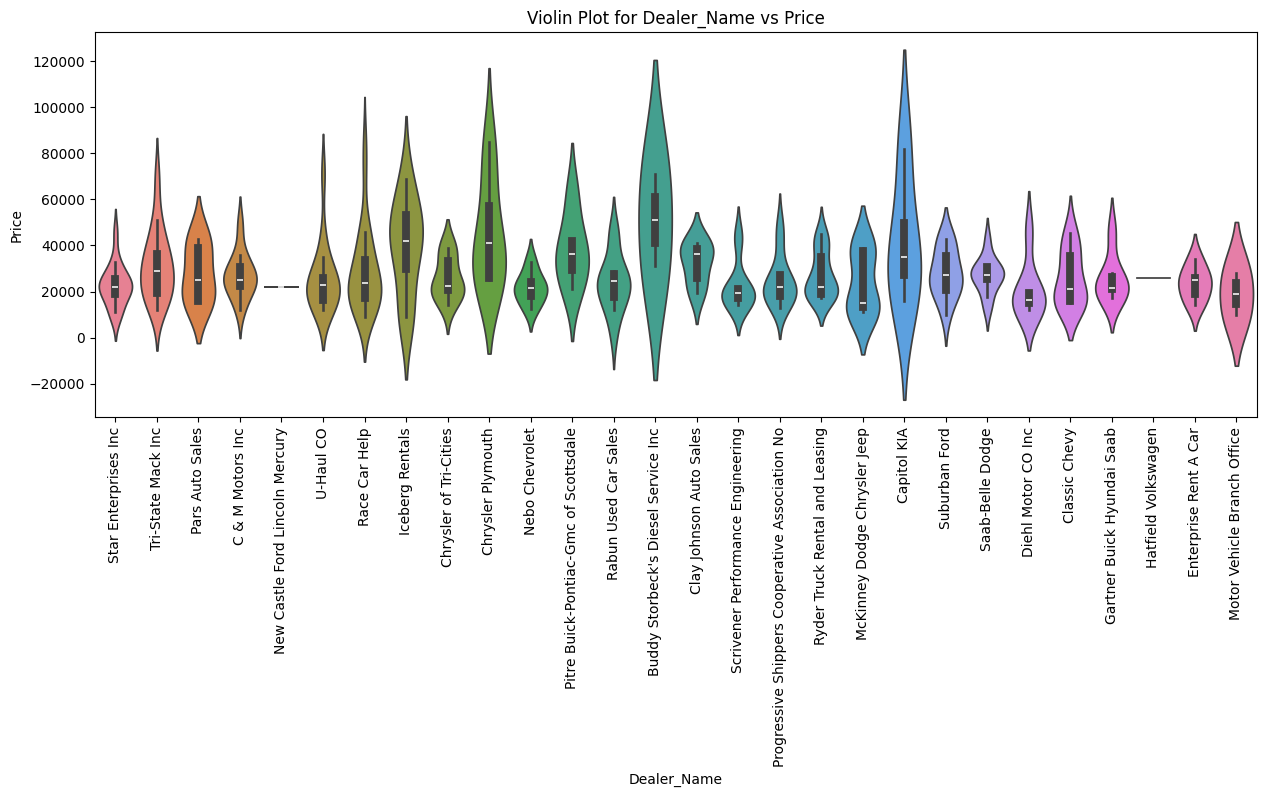

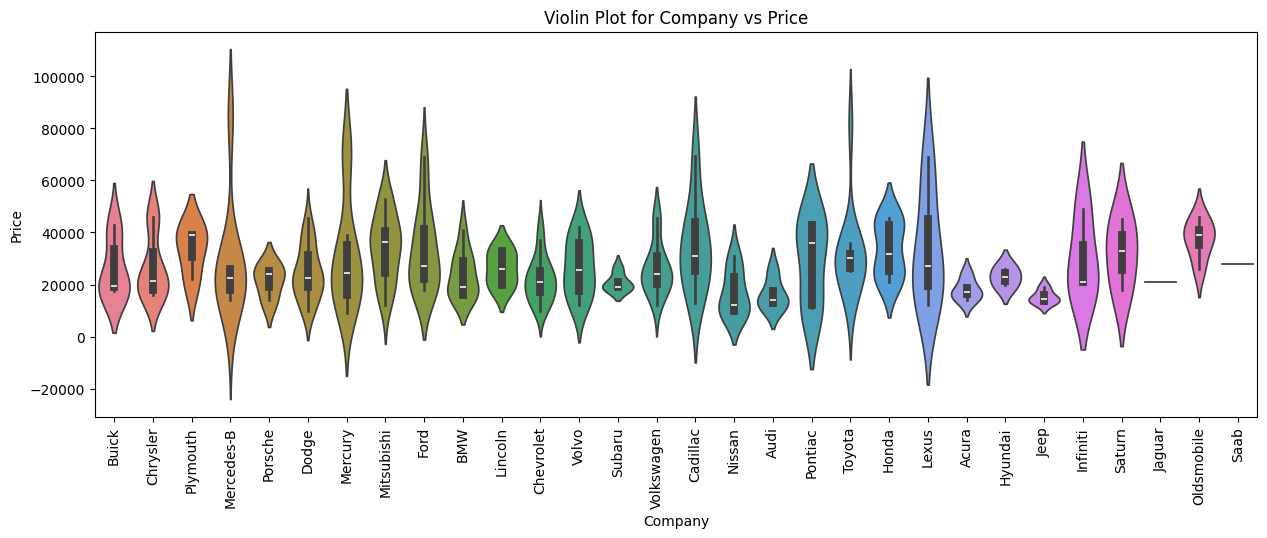

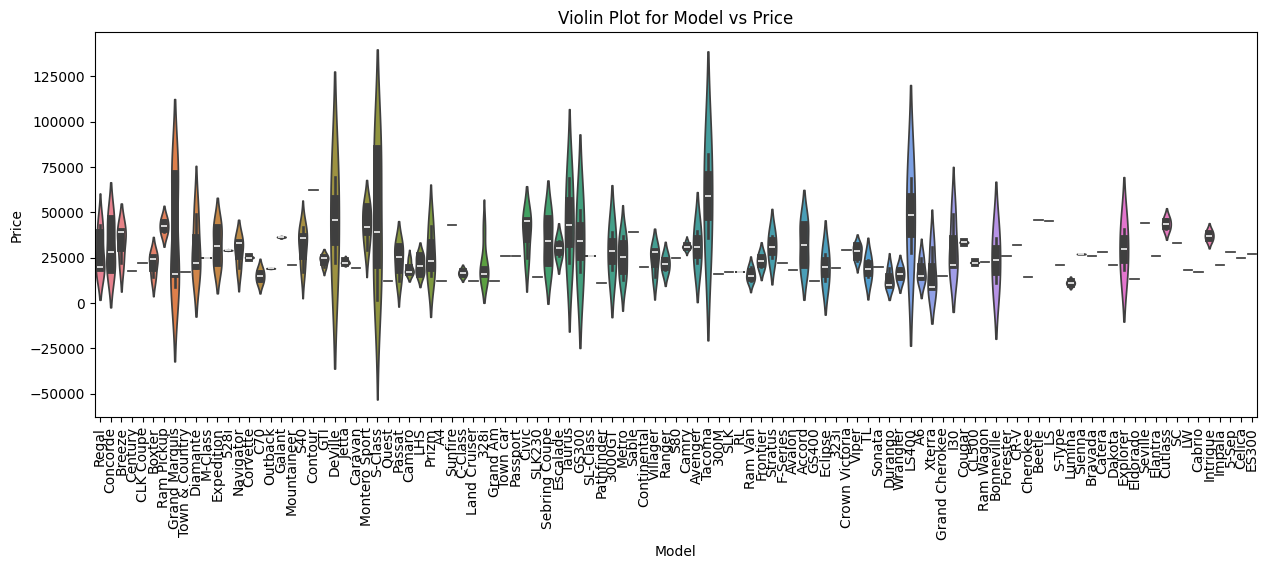

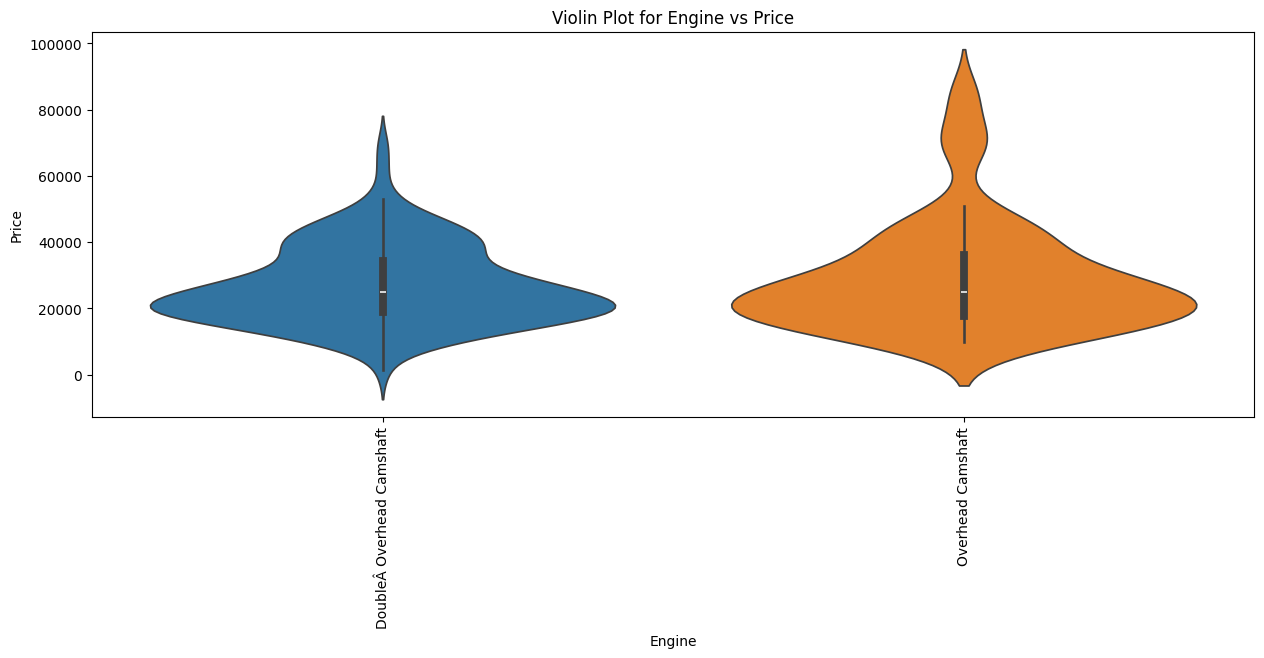

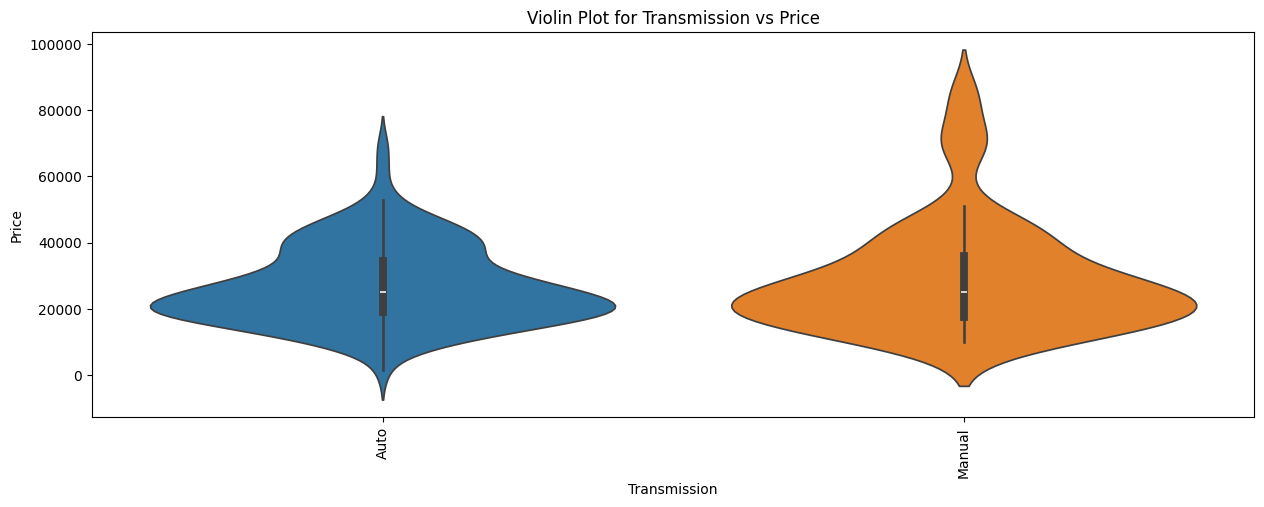

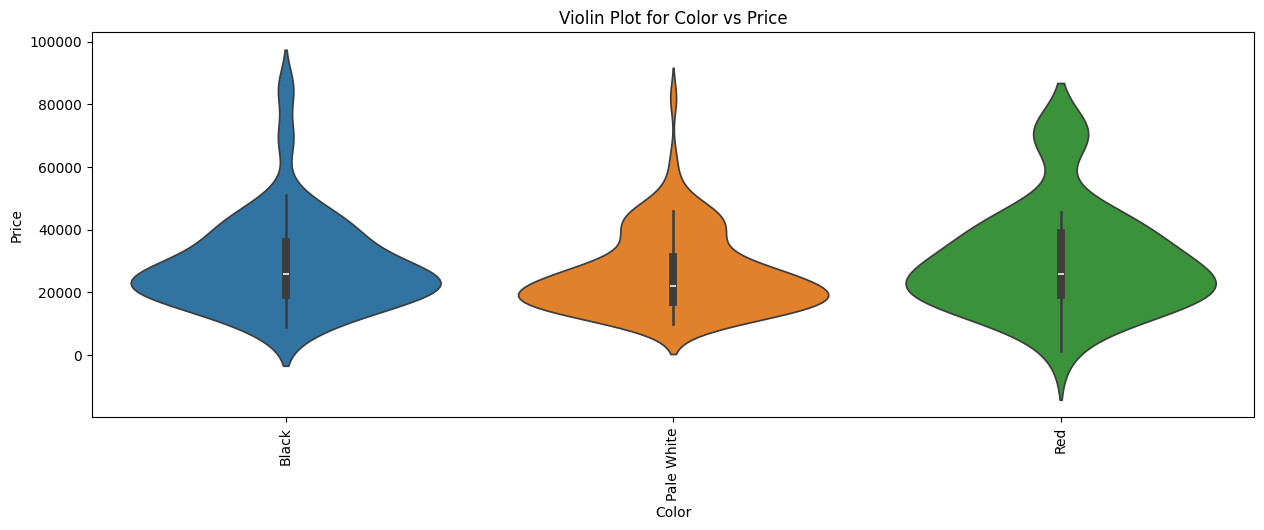

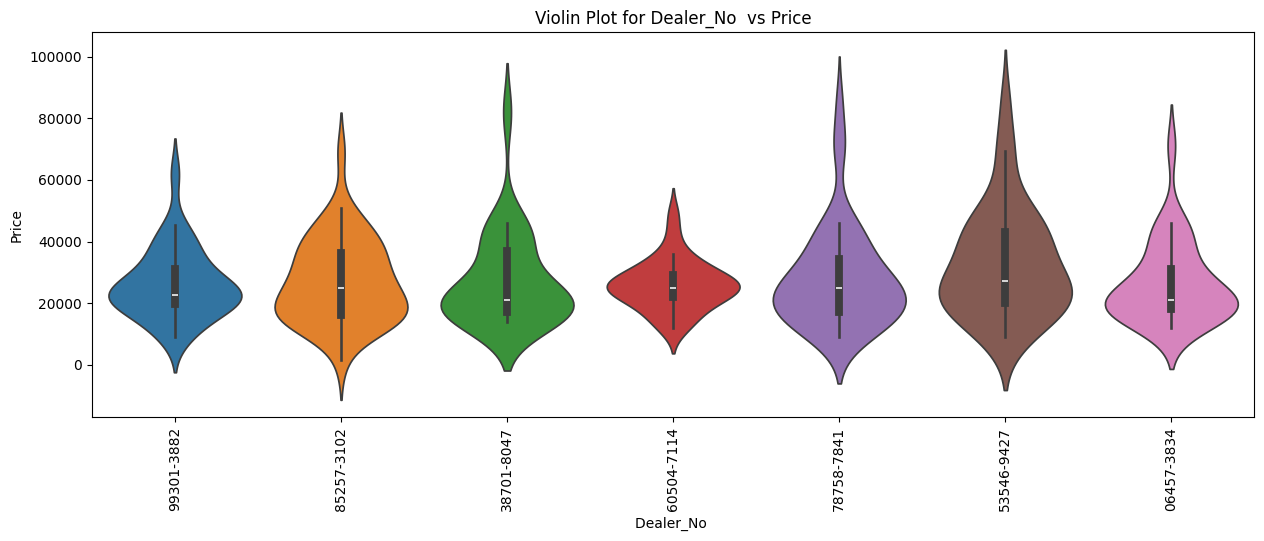

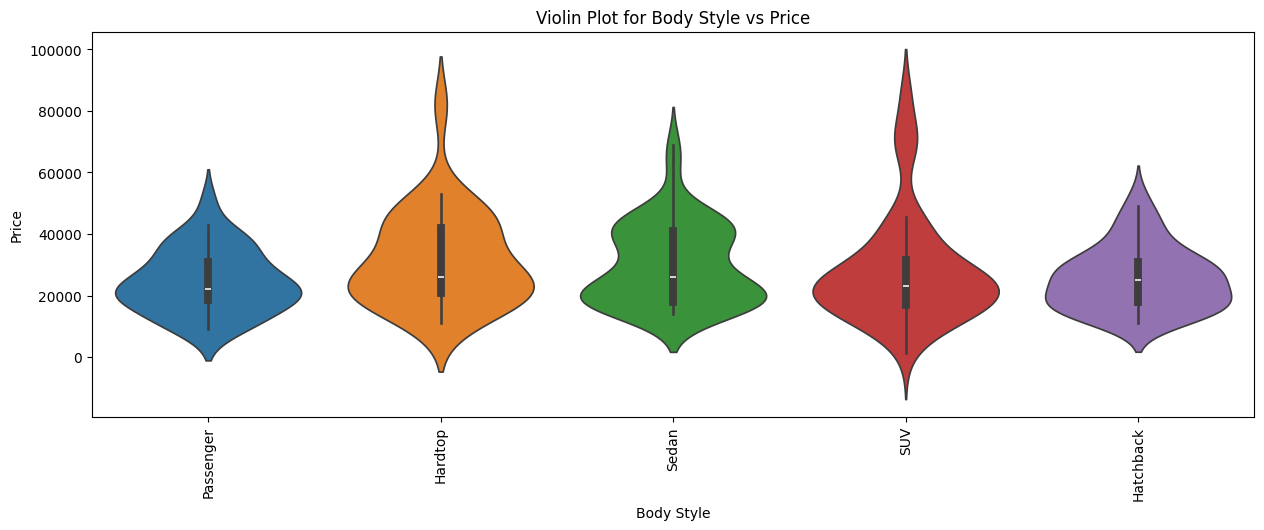

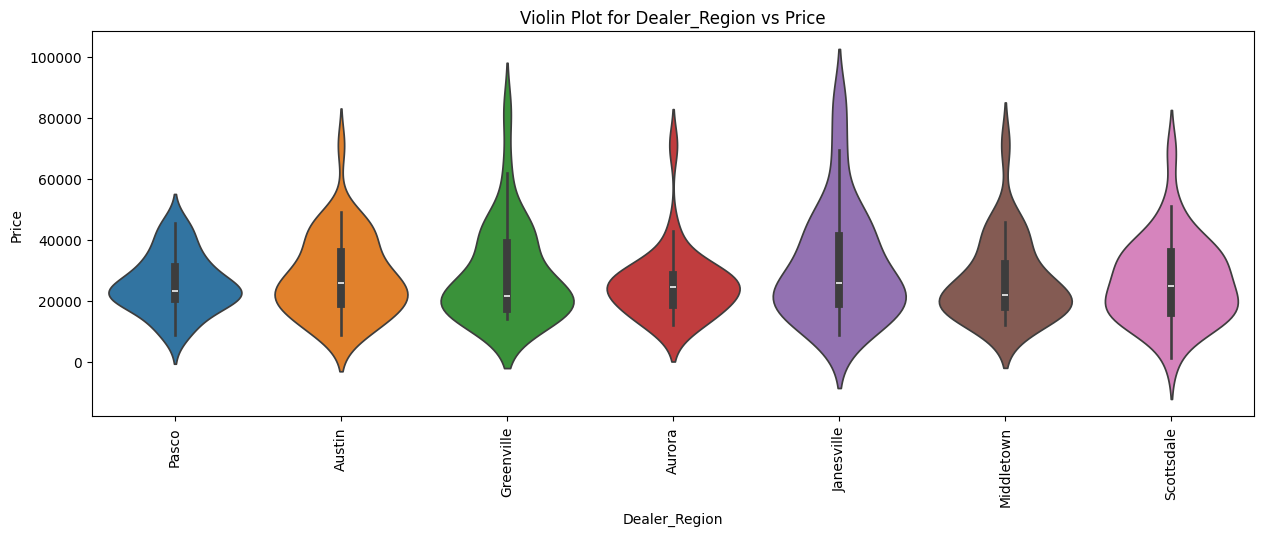

In [9]:
if not os.path.exists('./graph/bivariate'):
    os.makedirs('./graph/bivariate')

for i in range(len(object_columns)):
    plt.figure(figsize=(15, 5))
    sns.violinplot(x=object_columns[i], y='Price ($)', data=sampled_data, hue=object_columns[i])
    plt.title(f'Violin Plot for {object_columns[i]} vs Price')
    plt.xlabel(object_columns[i])
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.savefig(f'./graph/bivariate/{object_columns[i]}_vs_price_violinplot.png')

plt.show()


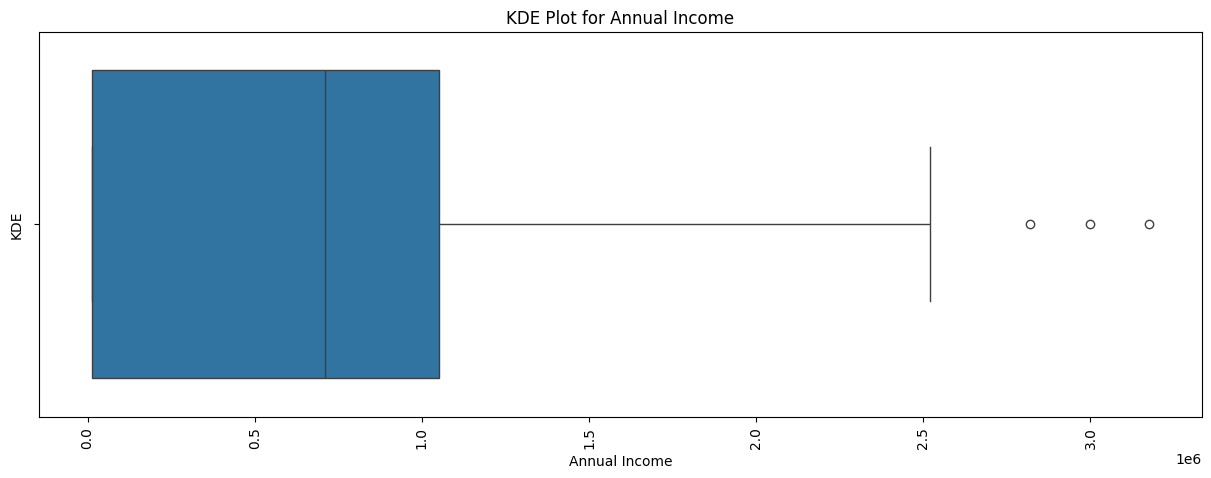

In [10]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=sampled_data['Annual Income'], data=sampled_data)
plt.title(f'KDE Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('KDE')
plt.xticks(rotation=90)
plt.savefig(f'./graph/bivariate/Annual_Income_KDE_plot.png')

plt.show()

## Multi-variate Analysis

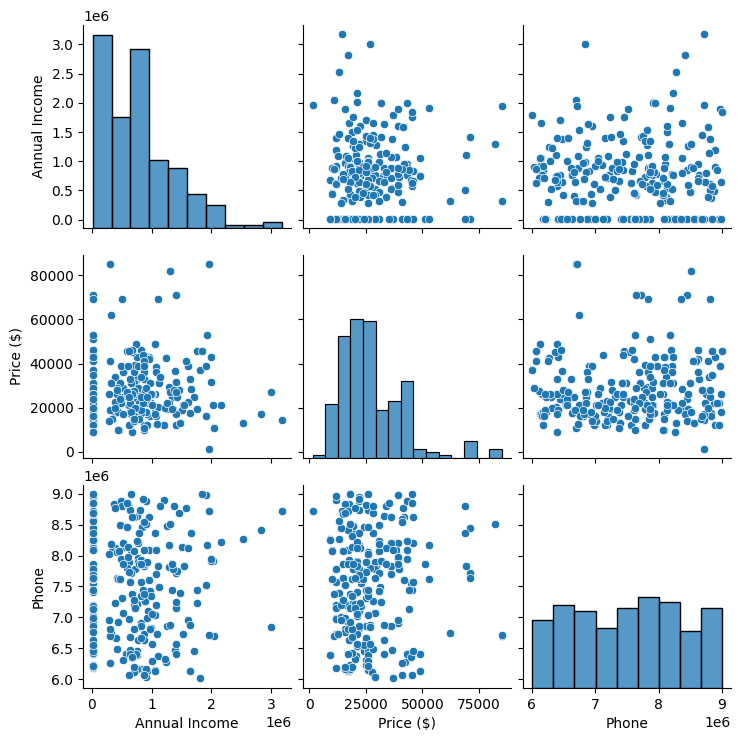

In [11]:
if not os.path.exists('./graph/multivariate'):
    os.makedirs('./graph/multivariate')

sns.pairplot(sampled_data)
plt.savefig('./graph/multivariate/pairplot.png')
plt.show()

# Convert, Encode, Normalization

## Convert `Date` to independent variable

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data = data.drop(['Date'], axis=1)

## Encoding

In [13]:
data = data.drop(['Car_id','Customer Name'], axis=1)

In [14]:
object_columns = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for i in range(len(object_columns)):
    data[object_columns[i]] = le.fit_transform(data[object_columns[i]])

## Normalizing

In [15]:
num_columns = data.select_dtypes(include=['int64', 'float64', 'int32']).columns
num_columns = num_columns.drop(['Price ($)'])

scaler = MinMaxScaler()
for i in range(len(num_columns)):
    data[num_columns[i]] = scaler.fit_transform(data[num_columns[i]].values.reshape(-1, 1))

# Features Analysis

In [16]:
data.head()

Gender  Annual Income  Dealer_Name   Company     Model  Engine  \
0     1.0       0.000306     0.000000  0.275862  0.392157     0.0   
1     1.0       0.131361     0.037037  0.241379  0.339869     0.0   
2     1.0       0.091593     0.074074  0.137931  0.372549     1.0   
3     1.0       0.000306     0.148148  0.931034  0.235294     1.0   
4     1.0       0.130021     0.111111  0.000000  0.921569     0.0   

   Transmission  Color  Price ($)  Dealer_No   Body Style     Phone  \
0           0.0    0.0      26000    0.000000        0.75  0.754990   
1           0.0    0.0      19000    0.500000        0.75  0.282745   
2           1.0    1.0      31500    0.166667        0.50  0.432974   
3           1.0    0.5      14000    1.000000        0.75  0.085834   
4           0.0    1.0      24500    0.333333        0.25  0.360523   

   Dealer_Region  Year  Month       Day  
0       0.666667   0.0    0.0  0.033333  
1       0.000000   0.0    0.0  0.033333  
2       0.333333   0.0    0.0  0.033333  
3       0.833333   0.0    0.0  0.033333  
4       0.500000   0.0    0.0  0.033333

In [17]:
summary_stats = data.describe()

print("Summary of Statistics:")
summary_stats

Summary of Statistics:


Gender  Annual Income   Dealer_Name       Company         Model  \
count  23906.000000   23906.000000  23906.000000  23906.000000  23906.000000   
mean       0.786330       0.073348      0.587790      0.489945      0.508799   
std        0.409905       0.064344      0.299926      0.300222      0.287410   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        1.000000       0.033595      0.333333      0.215517      0.274510   
50%        1.000000       0.064783      0.666667      0.517241      0.529412   
75%        1.000000       0.104171      0.851852      0.724138      0.751634   
max        1.000000       1.000000      1.000000      1.000000      1.000000   

             Engine  Transmission         Color     Price ($)    Dealer_No   \
count  23906.000000  23906.000000  23906.000000  23906.000000  23906.000000   
mean       0.474149      0.474149      0.435916  28090.247846      0.509091   
std        0.499342      0.499342      0.358033  14788.687608      0.326349   
min        0.000000      0.000000      0.000000   1200.000000      0.000000   
25%        0.000000      0.000000      0.000000  18001.000000      0.166667   
50%        0.000000      0.000000      0.500000  23000.000000      0.500000   
75%        1.000000      1.000000      0.500000  34000.000000      0.833333   
max        1.000000      1.000000      1.000000  85800.000000      1.000000   

         Body Style         Phone  Dealer_Region          Year         Month  \
count  23906.000000  23906.000000   23906.000000  23906.000000  23906.000000   
mean       0.534301      0.499300       0.492338      0.554714      0.622993   
std        0.330933      0.289214       0.331089      0.497008      0.296180   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.250000      0.248841       0.166667      0.000000      0.363636   
50%        0.500000      0.498786       0.500000      1.000000      0.727273   
75%        0.750000      0.749479       0.833333      1.000000      0.909091   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

                Day  
count  23906.000000  
mean       0.482435  
std        0.291139  
min        0.000000  
25%        0.233333  
50%        0.466667  
75%        0.733333  
max        1.000000

In [18]:
# Skewness and kurtosis
skewness = data.skew()
kurtosis = data.kurtosis()
# Display skewness and kurtosis values
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Skewness:
Gender          -1.397171
Annual Income    1.739838
Dealer_Name     -0.436012
Company          0.140170
Model           -0.109266
Engine           0.103550
Transmission     0.103550
Color            0.193628
Price ($)        1.466316
Dealer_No       -0.053531
Body Style      -0.088763
Phone            0.000863
Dealer_Region    0.070238
Year            -0.220193
Month           -0.415582
Day              0.036949
dtype: float64

Kurtosis:
Gender          -0.047918
Annual Income    7.572374
Dealer_Name     -1.059227
Company         -1.242038
Model           -1.134052
Engine          -1.989444
Transmission    -1.989444
Color           -1.041766
Price ($)        2.008315
Dealer_No       -1.217015
Body Style      -1.231417
Phone           -1.197919
Dealer_Region   -1.239599
Year            -1.951678
Month           -0.994360
Day             -1.190651
dtype: float64


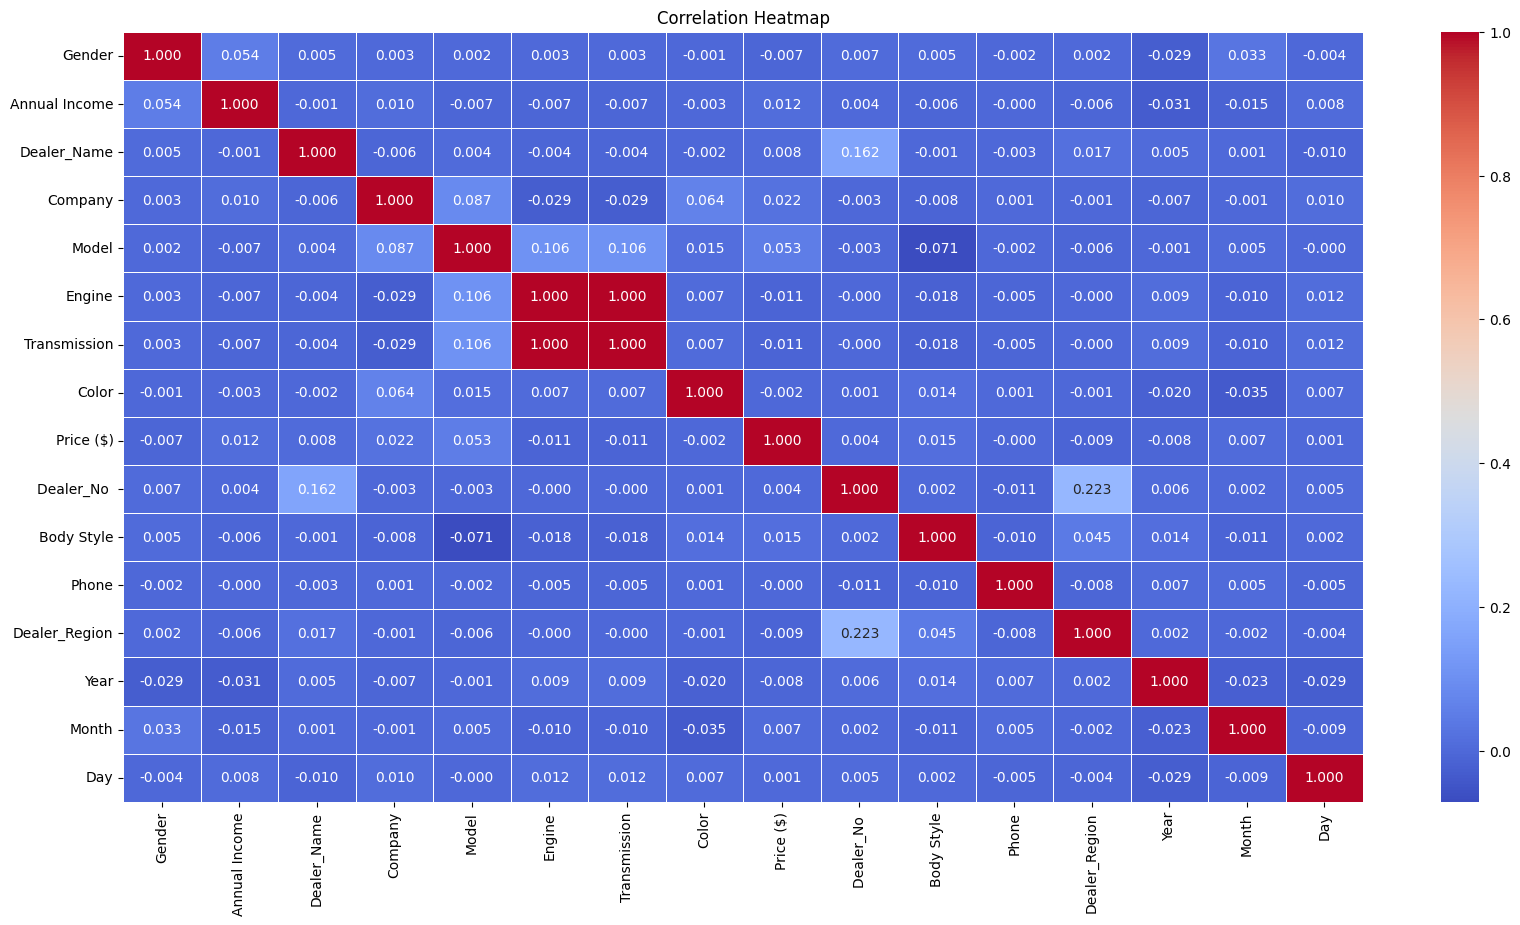

In [19]:
# Correlation matrix
correlation_matrix = data.corr()

# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt = ".3f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Calculate Multicollinearity
y = data.drop(["Price ($)"], axis =1)
X = sm.add_constant(y)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

         variable        VIF
0           const  34.660726
1          Gender   1.004938
2   Annual Income   1.004512
3     Dealer_Name   1.027468
4         Company   1.013523
5           Model   1.024921
6          Engine        inf
7    Transmission        inf
8           Color   1.006165
9      Dealer_No    1.081081
10     Body Style   1.007967
11          Phone   1.000395
12  Dealer_Region   1.055150
13           Year   1.003951
14          Month   1.003449
15            Day   1.001464


/root/miniconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [21]:
high_vif_variables = vif[vif["VIF"] >= 5]["variable"]
regression_data = X.drop(high_vif_variables, axis=1)

regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         23906 non-null  float64
 1   Annual Income  23906 non-null  float64
 2   Dealer_Name    23906 non-null  float64
 3   Company        23906 non-null  float64
 4   Model          23906 non-null  float64
 5   Color          23906 non-null  float64
 6   Dealer_No      23906 non-null  float64
 7   Body Style     23906 non-null  float64
 8   Phone          23906 non-null  float64
 9   Dealer_Region  23906 non-null  float64
 10  Year           23906 non-null  float64
 11  Month          23906 non-null  float64
 12  Day            23906 non-null  float64
dtypes: float64(13)
memory usage: 2.4 MB


# Regression

## KAN

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = regression_data
y = data['Price ($)']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

train_X = torch.tensor(train_X.values, dtype=torch.float32).to(device)
train_y = torch.tensor(train_y.values, dtype=torch.float32).view(-1, 1).to(device)
test_X = torch.tensor(test_X.values, dtype=torch.float32).to(device)
test_y = torch.tensor(test_y.values, dtype=torch.float32).view(-1, 1).to(device)

trainset = TensorDataset(train_X, train_y)

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    hidden_layers = trial.suggest_int("n_hidden_layers", 2, 5)
    hidden_units = trial.suggest_int("hidden_units", 2, 64)
    batchsize = trial.suggest_int("batchsize", 32, 2048)

    trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True)

    model = KAN([train_X.shape[1], hidden_units * hidden_layers, 1])
    model.to(torch.float32).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, foreach=False)
    criterion = nn.MSELoss()

    train_loss = 0
    model.train()
    for _ in range(100):
        for _, (X, y) in enumerate(trainloader):
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

    return train_loss


study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)

best_trial = study.best_trial
print("Best Learning Rate:", best_trial.params["learning_rate"])
print("Best Weight Decay:", best_trial.params["weight_decay"])
print("Best Number of Hidden Layers:", best_trial.params["n_hidden_layers"])
print("Best Hidden Units:", best_trial.params["hidden_units"])
print("Best Batch Size:", best_trial.params["batchsize"])

[I 2024-06-13 11:18:20,404] A new study created in memory with name: no-name-c385ca21-742e-496d-9b1e-dc0506ceaa72
[I 2024-06-13 11:18:48,262] Trial 0 finished with value: 4096932485008.0 and parameters: {'learning_rate': 0.00031489116479568613, 'weight_decay': 0.0071144760093434225, 'n_hidden_layers': 4, 'hidden_units': 39, 'batchsize': 346}. Best is trial 0 with value: 4096932485008.0.
[I 2024-06-13 11:19:06,729] Trial 1 finished with value: 1420837119232.0 and parameters: {'learning_rate': 4.207053950287933e-05, 'weight_decay': 1.493656855461762e-05, 'n_hidden_layers': 5, 'hidden_units': 39, 'batchsize': 1460}. Best is trial 1 with value: 1420837119232.0.
[I 2024-06-13 11:19:31,053] Trial 2 finished with value: 4962423829056.0 and parameters: {'learning_rate': 1.2087541473056957e-05, 'weight_decay': 0.008123245085588688, 'n_hidden_layers': 5, 'hidden_units': 15, 'batchsize': 398}. Best is trial 1 with value: 1420837119232.0.
[I 2024-06-13 11:19:50,957] Trial 3 finished with value: 31

Best Learning Rate: 0.0292314112967825
Best Weight Decay: 0.00044962004066950506
Best Number of Hidden Layers: 3
Best Hidden Units: 21
Best Batch Size: 1756


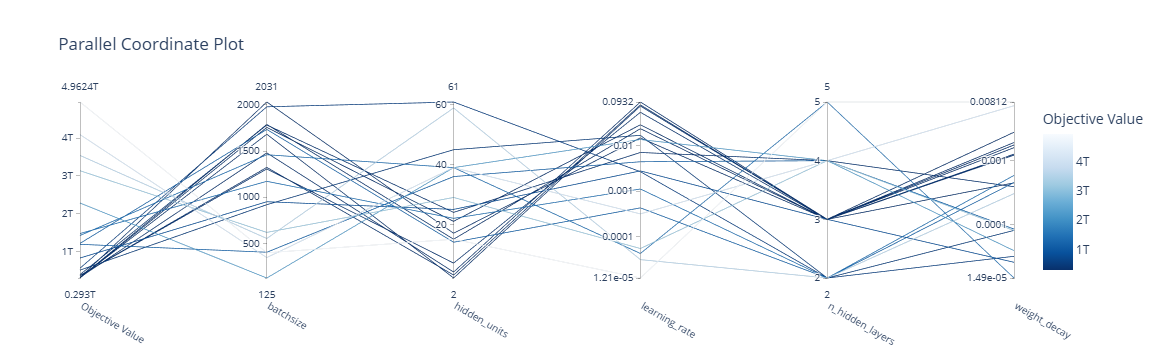

In [23]:
plot_parallel_coordinate(study)

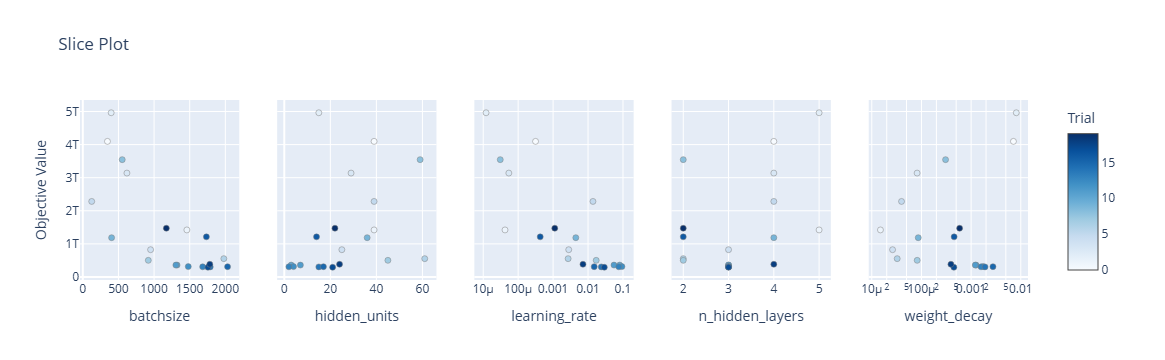

In [24]:
plot_slice(study)

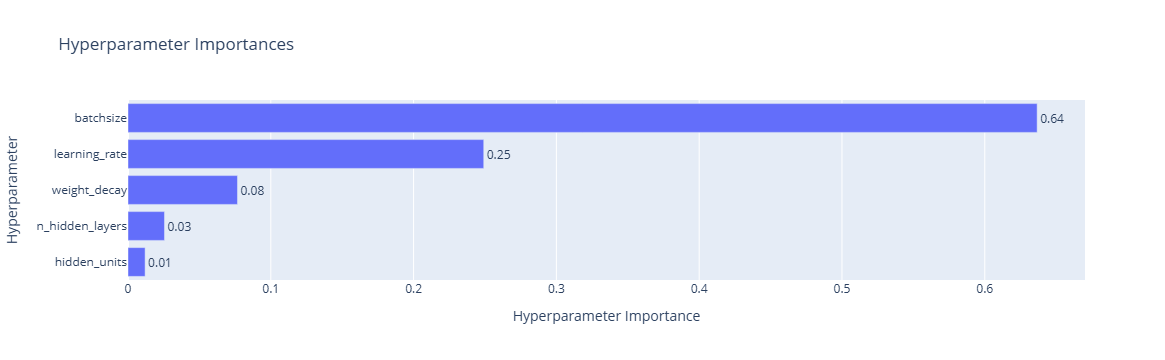

In [25]:
plot_param_importances(study)

In [26]:
best_learning_rate = best_trial.params["learning_rate"]
best_weight_decay = best_trial.params["weight_decay"]
best_hidden_layers = best_trial.params["n_hidden_layers"]
best_hidden_units = best_trial.params["hidden_units"]
best_batchsize = best_trial.params["batchsize"]

trainloader = DataLoader(trainset, batch_size=best_batchsize, shuffle=True)

model = KAN([train_X.shape[1], best_hidden_units * best_hidden_layers, 1])
model.to(torch.float32).to(device)

optimizer = optim.AdamW(model.parameters(), lr=best_learning_rate, weight_decay=best_weight_decay, foreach=False)
criterion = nn.MSELoss()

epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    with tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}") as pbar:
        for i, (X, y) in enumerate(pbar):
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix(loss=loss.item())
    train_losses.append(loss.item())

Epoch 100/100: 100%|██████████| 11/11 [00:00<00:00, 71.15it/s, loss=1.78e+8]


Mean Squared Error: 185624800.0
Mean Absolute Error: 10266.09765625
R2 Score: 0.1230540195698906


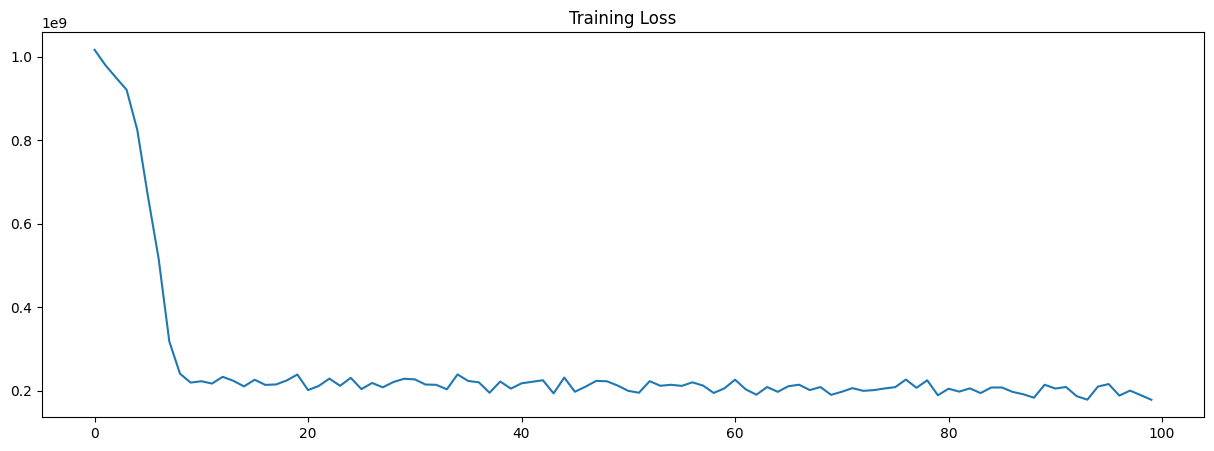

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(train_losses)
plt.title("Training Loss")

model.eval()

with torch.no_grad():
    y_pred = model(test_X).cpu().numpy()

mse = mean_squared_error(test_y.cpu(), y_pred)
r2 = r2_score(test_y.cpu(), y_pred)
mae = mean_absolute_error(test_y.cpu(), y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

## ResNet

In [28]:
class ResNet(nn.Module):
    def __init__(self, num_classes):
        super(ResNet, self).__init__()
        self.num_classes = num_classes
        
        self.resnet = models.resnet18()

        self.resnet.conv1 = nn.Conv2d(self.num_classes, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(512, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, self.num_classes, 1, 1)
        x = self.resnet(x)
        return x

In [29]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    batchsize = trial.suggest_int("batchsize", 32, 2048)

    trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True)

    model = ResNet(train_X.shape[1])
    model.to(torch.float32).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, foreach=False)
    criterion = nn.MSELoss()

    train_loss = 0
    model.train()
    for _ in range(100):
        for _, (X, y) in enumerate(pbar):
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

    return train_loss


study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)

best_trial = study.best_trial
print("Best Learning Rate:", best_trial.params["learning_rate"])
print("Best Weight Decay:", best_trial.params["weight_decay"])
print("Best Batch Size:", best_trial.params["batchsize"])

[I 2024-06-13 11:25:45,218] A new study created in memory with name: no-name-0687f42e-81cd-41ad-9edf-29fd8705ab81
[I 2024-06-13 11:26:13,672] Trial 0 finished with value: 1092532647104.0 and parameters: {'learning_rate': 0.00031489116479568613, 'weight_decay': 0.0071144760093434225, 'batchsize': 1508}. Best is trial 0 with value: 1092532647104.0.
[I 2024-06-13 11:26:41,280] Trial 1 finished with value: 653613510208.0 and parameters: {'learning_rate': 0.0024810409748678114, 'weight_decay': 2.9380279387035334e-05, 'batchsize': 346}. Best is trial 1 with value: 653613510208.0.
[I 2024-06-13 11:27:08,906] Trial 2 finished with value: 1113990650048.0 and parameters: {'learning_rate': 1.7073967431528103e-05, 'weight_decay': 0.003967605077052989, 'batchsize': 1244}. Best is trial 1 with value: 653613510208.0.
[I 2024-06-13 11:27:36,981] Trial 3 finished with value: 390668093760.0 and parameters: {'learning_rate': 0.006796578090758156, 'weight_decay': 1.1527987128232396e-05, 'batchsize': 1988}

Best Learning Rate: 0.0816552845050913
Best Weight Decay: 0.0004748459024928748
Best Batch Size: 658


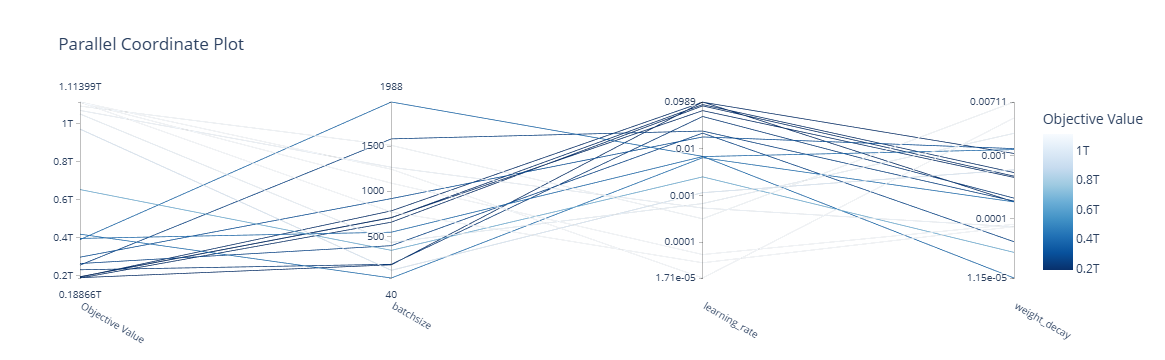

In [30]:
plot_parallel_coordinate(study)

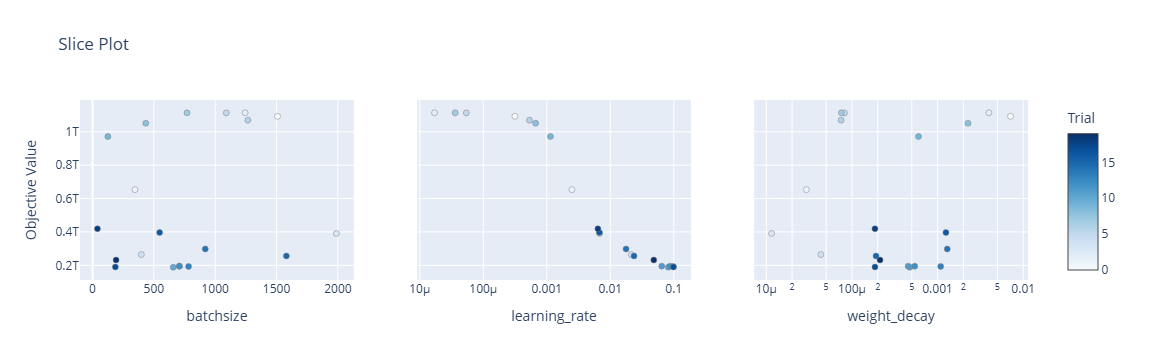

In [31]:
plot_slice(study)

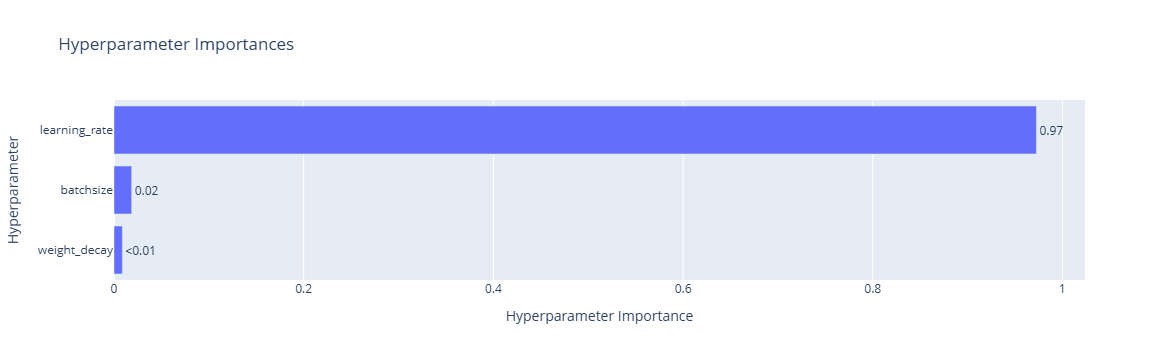

In [32]:
plot_param_importances(study)

In [33]:
best_learning_rate = best_trial.params["learning_rate"]
best_weight_decay = best_trial.params["weight_decay"]
best_batchsize = best_trial.params["batchsize"]

trainloader = DataLoader(trainset, batch_size=best_batchsize, shuffle=True)

model = ResNet(train_X.shape[1])
model.to(device)
model.float()

optimizer = optim.AdamW(model.parameters(), lr=best_learning_rate, weight_decay=best_weight_decay, foreach=False)
criterion = nn.MSELoss()

epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    with tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}") as pbar:
        for i, (X, y) in enumerate(pbar):
            X, y  = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix(loss=loss.item())
    train_losses.append(loss.item())

Epoch 100/100: 100%|██████████| 30/30 [00:00<00:00, 53.55it/s, loss=1.49e+8]


Mean Squared Error: 132717744.0
Mean Absolute Error: 8130.2548828125
R2 Score: 0.37300247180760704


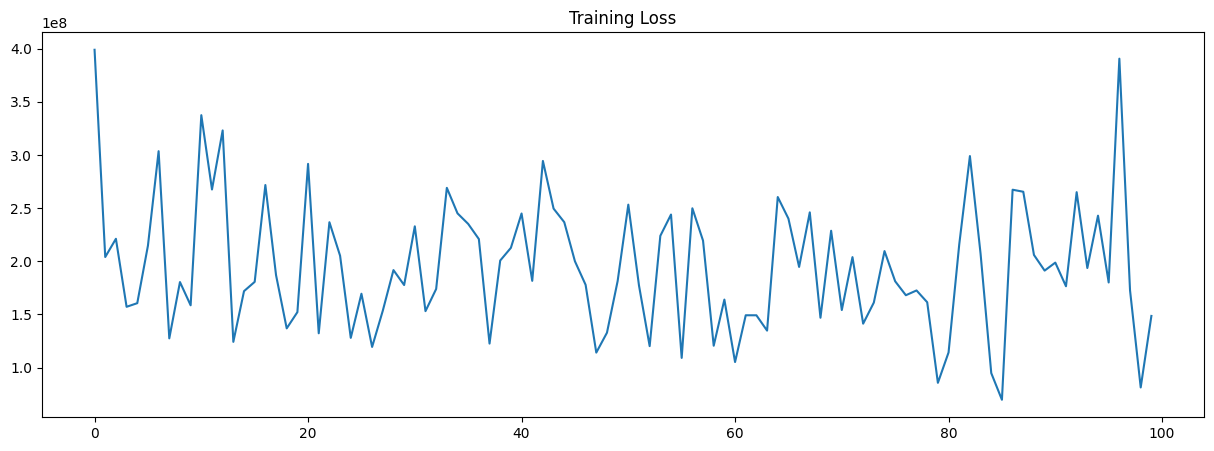

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(train_losses)
plt.title("Training Loss")

model.eval()

with torch.no_grad():
    y_pred = model(test_X).cpu().numpy()

mse = mean_squared_error(test_y.cpu(), y_pred)
r2 = r2_score(test_y.cpu(), y_pred)
mae = mean_absolute_error(test_y.cpu(), y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

# Linear Sequence Analysis

## ARIMA

In [35]:
df = pd.read_csv('./data/car_data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.head()

Car_id       Date Customer Name Gender  Annual Income  \
0  C_CND_000001 2022-01-02     Geraldine   Male          13500   
1  C_CND_000002 2022-01-02           Gia   Male        1480000   
2  C_CND_000003 2022-01-02        Gianna   Male        1035000   
3  C_CND_000004 2022-01-02       Giselle   Male          13500   
4  C_CND_000005 2022-01-02         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [36]:
new_df = df.loc[:, ['Date', 'Price ($)']]
new_df.head()

Date  Price ($)
0 2022-01-02      26000
1 2022-01-02      19000
2 2022-01-02      31500
3 2022-01-02      14000
4 2022-01-02      24500

In [37]:
new_df.fillna(new_df.mean(), inplace = True)

In [38]:
new_df.set_index('Date', inplace = True)
data_monthly_mean = new_df.resample('M').mean()

In [39]:
# Moving Average 
# Calculate Simple Moving Average (SMA)
sma_period = 10
new_df['SMA'] = data_monthly_mean['Price ($)'].rolling(window=sma_period).mean().reindex(new_df.index, method='ffill')

# Calculate Exponential Moving Average (EMA)
ema_period = 10
data_monthly_mean['EMA'] = data_monthly_mean['Price ($)'].ewm(span=ema_period, adjust=False).mean()
new_df['EMA'] = data_monthly_mean['EMA'].reindex(new_df.index, method='ffill')

# Calculate Cummulative Moving Average (CMA)
new_df['CMA'] = data_monthly_mean['Price ($)'].expanding(min_periods=1).mean().reindex(new_df.index, method='ffill')

# Calculate Weighted Moving Average (WMA)
wma_period = 10 
weights = pd.Series(range(1, wma_period + 1))
def weighted_moving_average(prices):
    return np.dot(prices, weights) / weights.sum()

new_df['WMA'] = data_monthly_mean['Price ($)'].rolling(window=wma_period).apply(weighted_moving_average, raw=True).reindex(new_df.index, method='ffill')

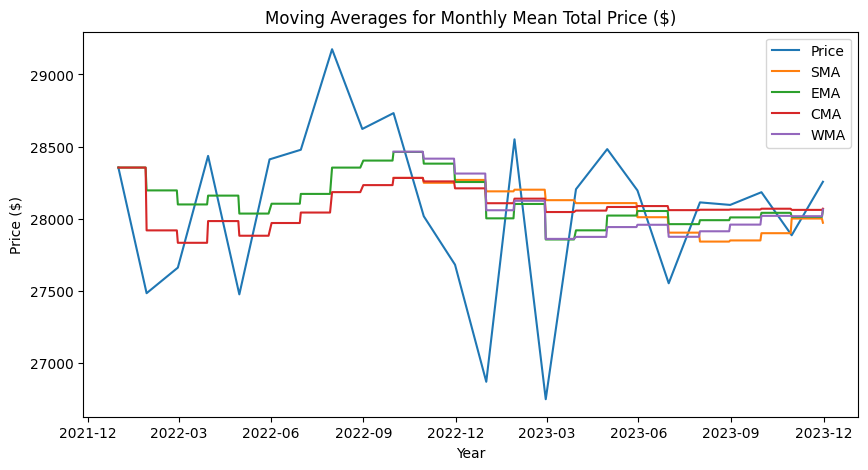

In [40]:
plt.figure(figsize = (10, 5))
plt.plot(data_monthly_mean['Price ($)'], label = 'Price')
plt.plot(new_df['SMA'], label = 'SMA')
plt.plot(new_df['EMA'], label = 'EMA')
plt.plot(new_df['CMA'], label = 'CMA')
plt.plot(new_df['WMA'], label = 'WMA')
plt.title('Moving Averages for Monthly Mean Total Price ($)')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [41]:
def adf_test(series):
    adf_statistic, p_value, _, _, critical_values, _= adfuller(series)
    print(f'ADF Statistics: {adf_statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    print('Critical values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value:.4f}')
    
print("Original Data ADF Test:")
adf_test(data_monthly_mean['Price ($)'])


Original Data ADF Test:
ADF Statistics: -4.5370
p-value: 0.0002
Critical values:
   1%: -3.7529
   5%: -2.9985
   10%: -2.6390


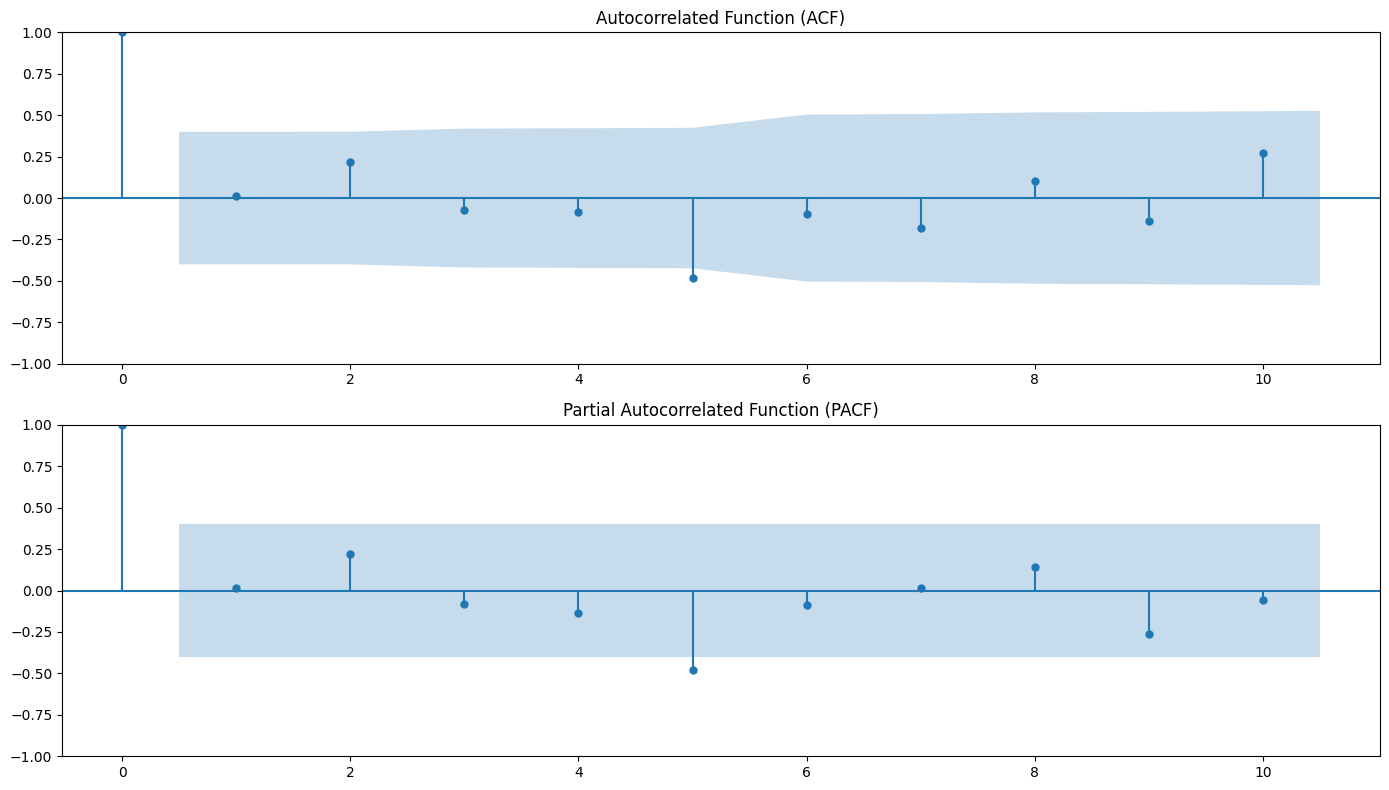

In [42]:
plt.figure(figsize = (14, 8))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(data_monthly_mean['Price ($)'], lags = 10, ax = plt.gca())
plt.title('Autocorrelated Function (ACF)')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(data_monthly_mean['Price ($)'], lags = 10, ax = plt.gca())
plt.title('Partial Autocorrelated Function (PACF)')
plt.tight_layout()
plt.show()

In [43]:
from statsmodels.tsa.stattools import acf, pacf
acf_values = acf(data_monthly_mean['Price ($)'], nlags = 10)
pacf_values = pacf(data_monthly_mean['Price ($)'], nlags = 10)

In [44]:
# Calculate the 95% confidence interval threshold
n = len(data_monthly_mean['Price ($)'])
threshold = 1.96/np.sqrt(n)

# Count significant values for p and q
significant_p_values = sum(abs(pacf_values[1:]) > threshold)
significant_q_values = sum(abs(acf_values[1:]) > threshold)

print(f"Number significant p values: {significant_p_values}")
print(f"Number significant q values: {significant_q_values}")

Number significant p values: 2
Number significant q values: 1


In [45]:
p = 2
d = 0 
q = 1

In [46]:
model = ARIMA(data_monthly_mean['Price ($)'], order = (p, d, q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Price ($)   No. Observations:                   24
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -184.733
Date:                Thu, 13 Jun 2024   AIC                            379.466
Time:                        11:35:47   BIC                            385.356
Sample:                    01-31-2022   HQIC                           381.029
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.807e+04    137.790    203.733      0.000    2.78e+04    2.83e+04
ar.L1         -0.8344      0.241     -3.462      0.001      -1.307      -0.362
ar.L2          0.1654      0.232      0.712      0.4

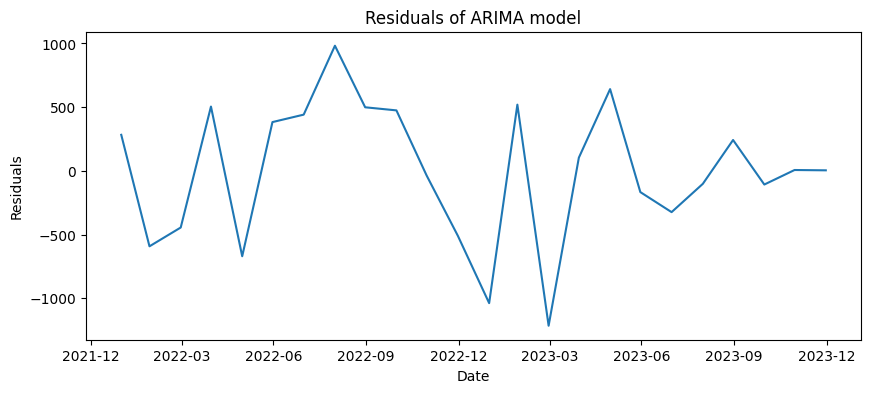

In [47]:
residuals = results.resid
plt.figure(figsize = (10, 4))
plt.plot(residuals)
plt.title('Residuals of ARIMA model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [48]:
train_size = int(len(data_monthly_mean)*0.8)
train, validation = data_monthly_mean.iloc[:train_size], data_monthly_mean.iloc[train_size:]

In [49]:
predictions = results.predict(start = validation.index[0], end = validation.index[-1], type = 'levels')

In [50]:
rmse_score = rmse(validation['Price ($)'], predictions)
print(f'Root Mean Squared Error (RMSE): {rmse_score}')

Root Mean Squared Error (RMSE): 126.89816700498696


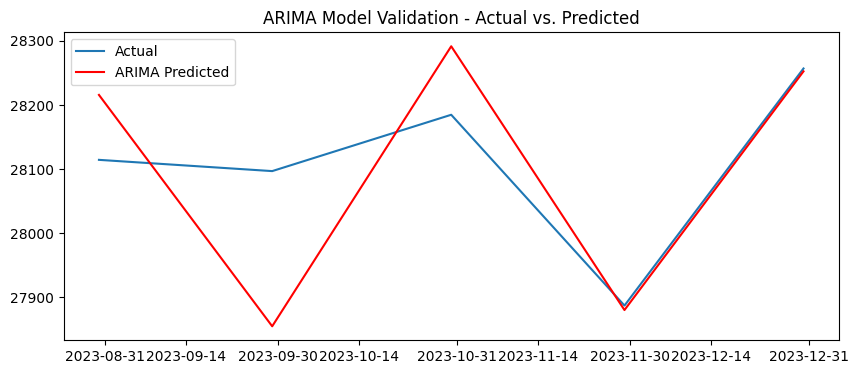

In [51]:
plt.figure(figsize = (10, 4))
plt.plot(validation['Price ($)'], label = 'Actual')
plt.plot(predictions, color = 'red', label = 'ARIMA Predicted')
plt.title('ARIMA Model Validation - Actual vs. Predicted')
plt.legend()
plt.show()

In [52]:
forecast_steps = 12
forecast = results.get_forecast(steps = forecast_steps)
predicted_values = forecast.predicted_mean
print(predicted_values)

2024-01-31    27891.862352
2024-02-29    28253.427561
2024-03-31    27891.358300
2024-04-30    28253.265530
2024-05-31    27891.410127
2024-06-30    28253.195486
2024-07-31    27891.477143
2024-08-31    28253.127984
2024-09-30    27891.544550
2024-10-31    28253.060576
2024-11-30    27891.611943
2024-12-31    28252.993195
Freq: M, Name: predicted_mean, dtype: float64


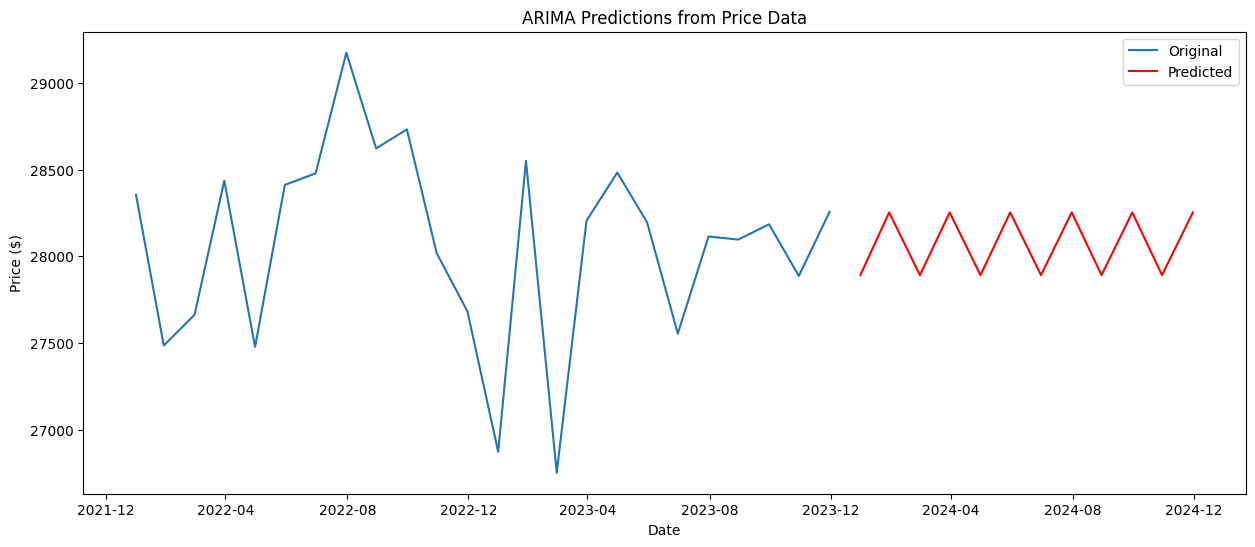

In [53]:
plt.figure(figsize = (15, 6))
plt.plot(data_monthly_mean['Price ($)'], label = 'Original')
plt.plot(predicted_values.index, predicted_values.values, color = 'red', label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('ARIMA Predictions from Price Data')
plt.legend()
plt.show()

## LSTM Model

In [54]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMRegressor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [55]:
X = data.drop(['Price ($)'], axis=1)
y = data['Price ($)']

X = X.values
y = y.values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

def objective(trial):
    input_size = X_train.shape[1]
    hidden_size = trial.suggest_int('hidden_size', 10, 100)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    
    model = LSTMRegressor(input_size, hidden_size, num_layers, output_size=1).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    num_epochs = 20
    for _ in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.unsqueeze(1).to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = 0
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch.unsqueeze(1))
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    
    return val_loss

input_size = 15
output_size = 1
num_epochs = 100

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)

print(f'Best hyperparameters: {study.best_params}')

best_params = study.best_params
input_size = 15
hidden_size = best_params['hidden_size']
num_layers = best_params['num_layers']
learning_rate = best_params['learning_rate']

model = LSTMRegressor(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

[I 2024-06-13 11:35:48,570] A new study created in memory with name: no-name-485b7570-ef12-42df-acc5-6171640ecbb7
/tmp/ipykernel_812/2907795212.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-06-13 11:35:58,907] Trial 0 finished with value: 36837852416.0 and parameters: {'hidden_size': 44, 'num_layers': 3, 'learning_rate': 0.0029106359131330704}. Best is trial 0 with value: 36837852416.0.
[I 2024-06-13 11:36:04,961] Trial 1 finished with value: 37400966016.0 and parameters: {'hidden_size': 64, 'num_layers': 1, 'learning_rate': 0.00020511104188433984}. Best is trial 0 with value: 36837852416.0.
[I 2024-06-13 11:36:12,602] Trial 2 finished with value: 37351265728.0 and parameters: {'hidden_size': 15, 'num_layers': 3, 'learning_rate': 0.0015930522616241021}. Best is trial 0 with value: 36837852416.0.
[I 2024-06-13 11:

Best hyperparameters: {'hidden_size': 87, 'num_layers': 2, 'learning_rate': 0.0099524331661705}


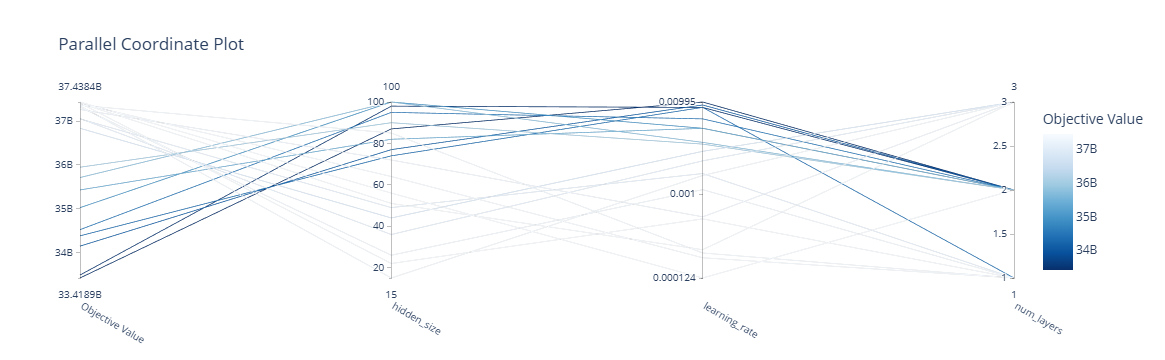

In [56]:
plot_parallel_coordinate(study)

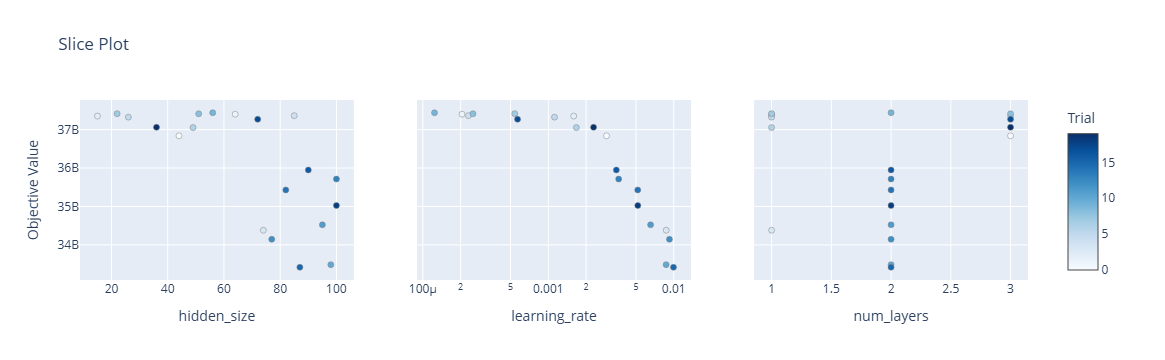

In [57]:
plot_slice(study)

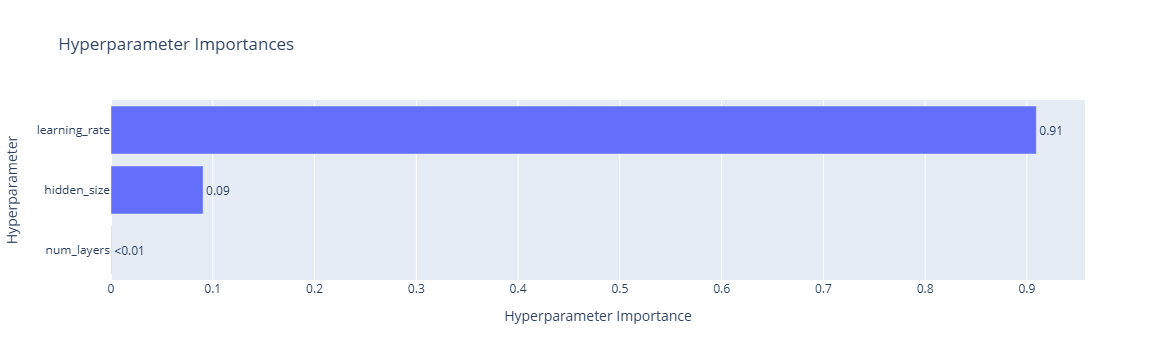

In [58]:
plot_param_importances(study)

In [59]:
train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}') as pbar:
        for X_batch, y_batch in pbar:
            optimizer.zero_grad()
            outputs = model(X_batch.unsqueeze(1))
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix(loss=loss.item())
    train_losses.append(train_loss)


Epoch 100/100: 100%|██████████| 150/150 [00:00<00:00, 209.34it/s, loss=5.85e+8]


Mean Squared Error: 535026912.0
Mean Absolute Error: 18005.072265625
R2 Score: -1.527623913682163


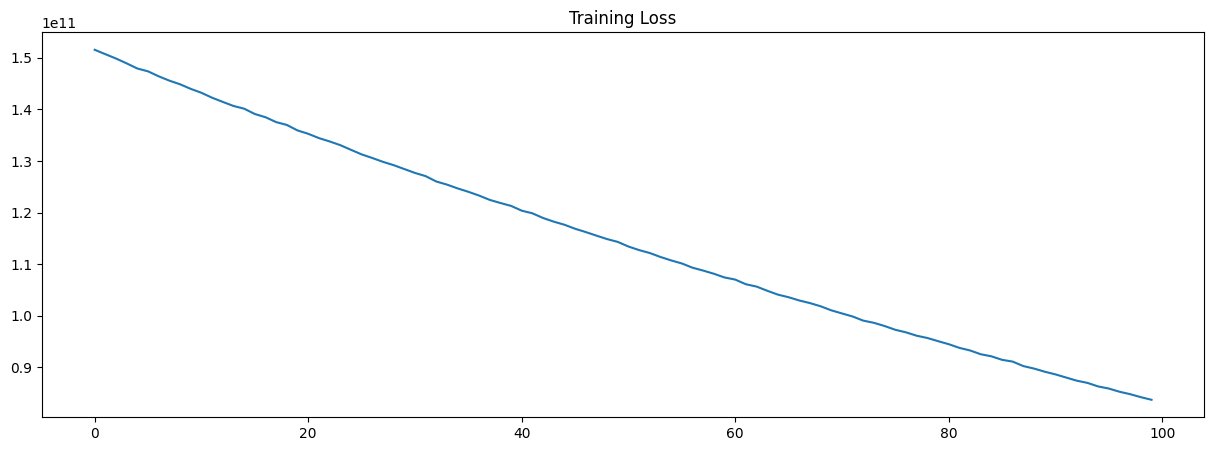

In [60]:
plt.figure(figsize=(15, 5))
plt.plot(train_losses)
plt.title("Training Loss")

model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor.unsqueeze(1)).cpu().numpy()

mse = mean_squared_error(test_y.cpu(), y_pred)
r2 = r2_score(test_y.cpu(), y_pred)
mae = mean_absolute_error(test_y.cpu(), y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")